<a href="https://colab.research.google.com/github/sebastianradityo/finalproject_ildat/blob/main/KELOMPOK_4_FINAL_PROJECT_ILMU_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT ILMU DATA KELOMPOK 4 - "Penerapan Model Machine Learning untuk Memprediksi Fraud Auto Insurance"

Anggota:

Arjun Michael Rogan - 2206032860

Audrey Febe Gaberia Siregar - 2206052010

Fedora Almanda - 2206052004

Sean Felix Fefri Hutagaol - 2206051840

Sebastianus Radityo Yoga Pradana - 2206051853

In [ ]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve, StratifiedKFold
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report, roc_auc_score, f1_score, confusion_matrix, RocCurveDisplay
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay

In [ ]:
#Import data
from google.colab import files
uploaded = files.upload()
df = pd.read_excel(list(uploaded.keys())[0])

Saving insurance_claims.xlsx to insurance_claims.xlsx


In [ ]:
# Check dimensions of the DataFrame
rows, columns = df.shape
print(f"The DataFrame has {rows} rows and {columns} columns.")

The DataFrame has 1000 rows and 40 columns.


In [ ]:
pd.set_option('display.max_columns', None)
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       2014-10-17           OH   
1                   228   42         342868       2006-06-27           IN   
2                   134   29         687698       2000-09-06           OH   
3                   256   41         227811       1990-05-25           IL   
4                   228   44         367455       2014-06-06           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       1991-07-16           OH   
996                 285   41         186934       2014-01-05           IL   
997                 130   34         918516       2003-02-17           OH   
998                 458   62         533940       2011-11-18           IL   
999                 456   60         556080       1996-11-11           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
0         466132        MALE                      MD       craft-repair   
1         468176        MALE                      MD  machine-op-inspct   
2         430632      FEMALE                     PhD              sales   
3         608117      FEMALE                     PhD       armed-forces   
4         610706        MALE               Associate              sales   
..           ...         ...                     ...                ...   
995       431289      FEMALE                 Masters       craft-repair   
996       608177      FEMALE                     PhD     prof-specialty   
997       442797      FEMALE                 Masters       armed-forces   
998       441714        MALE               Associate  handlers-cleaners   
999       612260      FEMALE               Associate              sales   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
0          sleeping              husband          53300             0   
1           reading       other-relative              0             0   
2       board-games            own-child          35100             0   
3       board-games            unmarried          48900        -62400   
4       board-games            unmarried          66000        -46000   
..              ...                  ...            ...           ...   
995       paintball            unmarried              0             0   
996        sleeping                 wife          70900             0   
997  bungie-jumping       other-relative          35100             0   
998    base-jumping                 wife              0             0   
999        kayaking              husband              0             0   

    incident_date             incident_type   collision_type  \
0      2015-01-25  Single Vehicle Collision   Side Collision   
1      2015-01-21             Vehicle Theft                ?   
2      2015-02-22   Multi-vehicle Collision   Rear Collision   
3      2015-01-10  Single Vehicle Collision  Front Collision   
4      2015-02-17             Vehicle Theft                ?   
..   

EDA

In [ ]:
#Definisi
nom_col = ['policy_bind_date','policy_state', 'policy_csl', 'insured_zip','insured_sex', 'insured_occupation', 'insured_hobbies', 'incident_date','incident_type', 'collision_type', 'authorities_contacted',
                   'incident_state', 'incident_city','incident_location', 'property_damage', 'police_report_available', 'auto_make','auto_model','insured_relationship']
ord_col = ['insured_education_level', 'incident_severity']
num_col = ['months_as_customer', 'age','policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss',
                   'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
                   'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']
respon = ['fraud_reported']

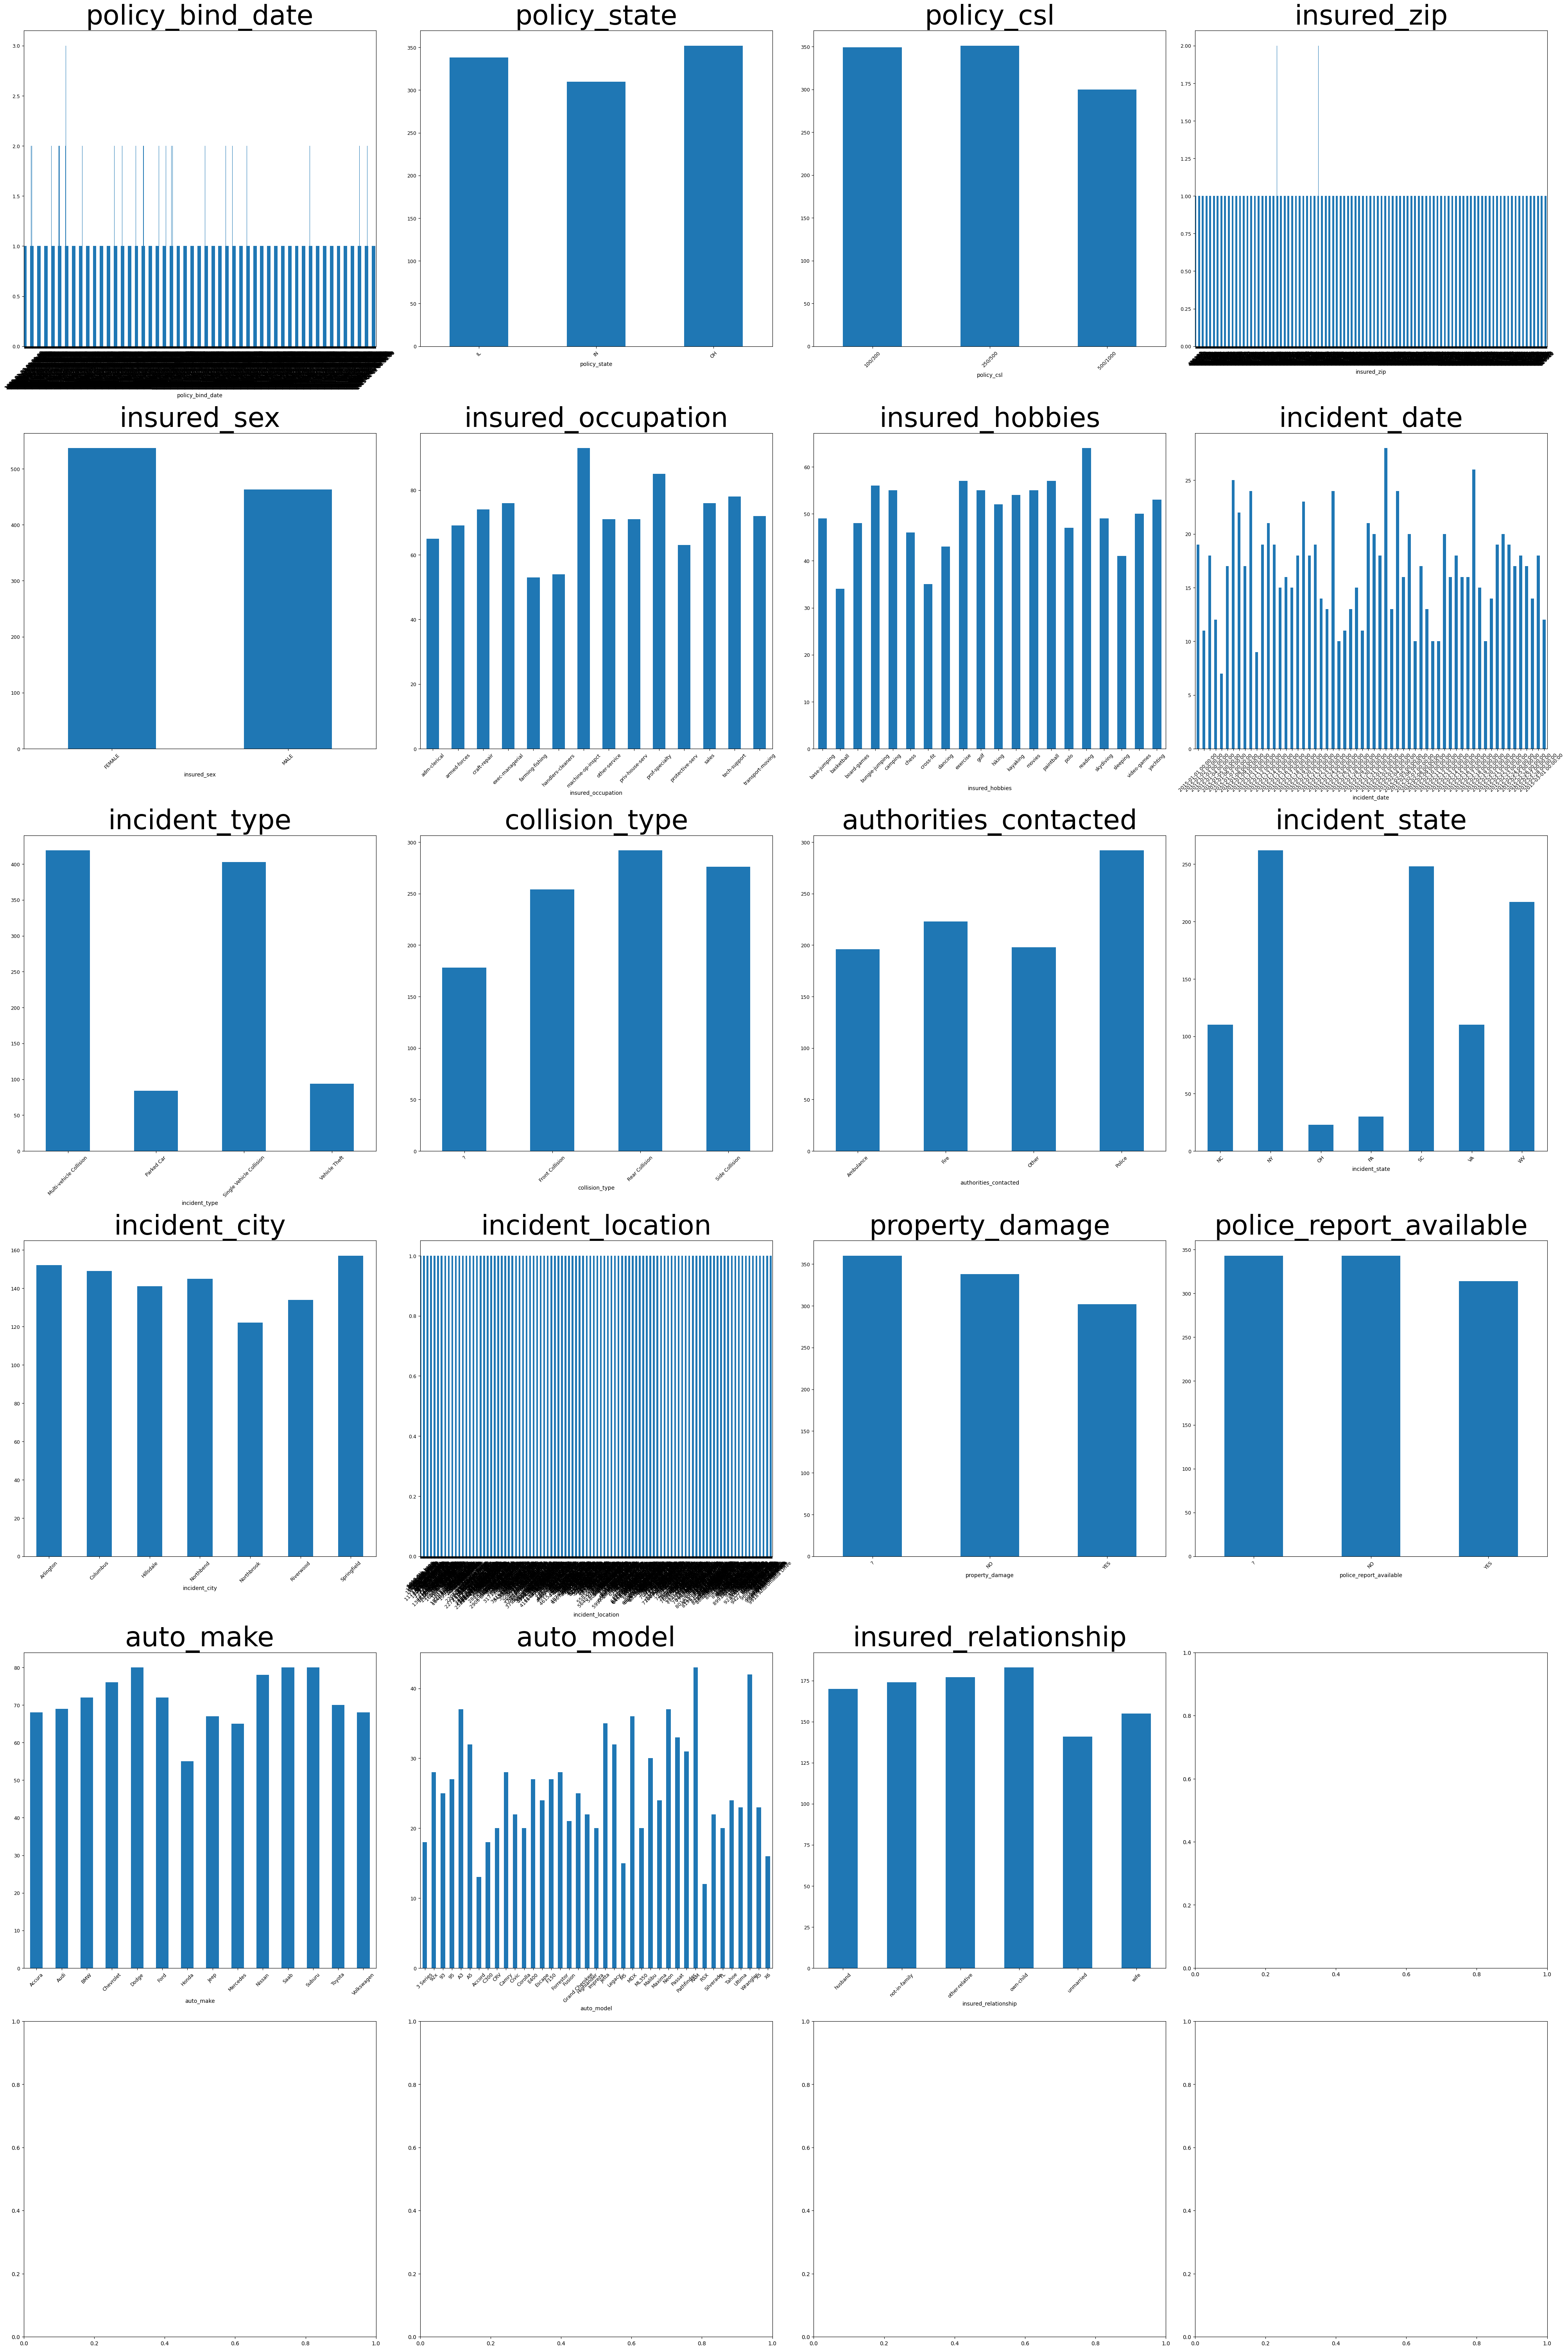

In [ ]:
#Visualisasi
#nominal
fig, ax = plt.subplots(6, 4, figsize=(40,60), constrained_layout=True)
for i in range(6):
    for j in range(4):
        if 4*i + j < len(nom_col):
            # Convert the index to string type before sorting
            df[nom_col[4*i + j]].value_counts().sort_index(key=lambda x: x.astype(str)).plot.bar(ax=ax[i, j])
            ax[i, j].tick_params('x', rotation=45)
            ax[i, j].tick_params(labelsize=9)
            ax[i, j].set_title(nom_col[4*i + j], size=50)

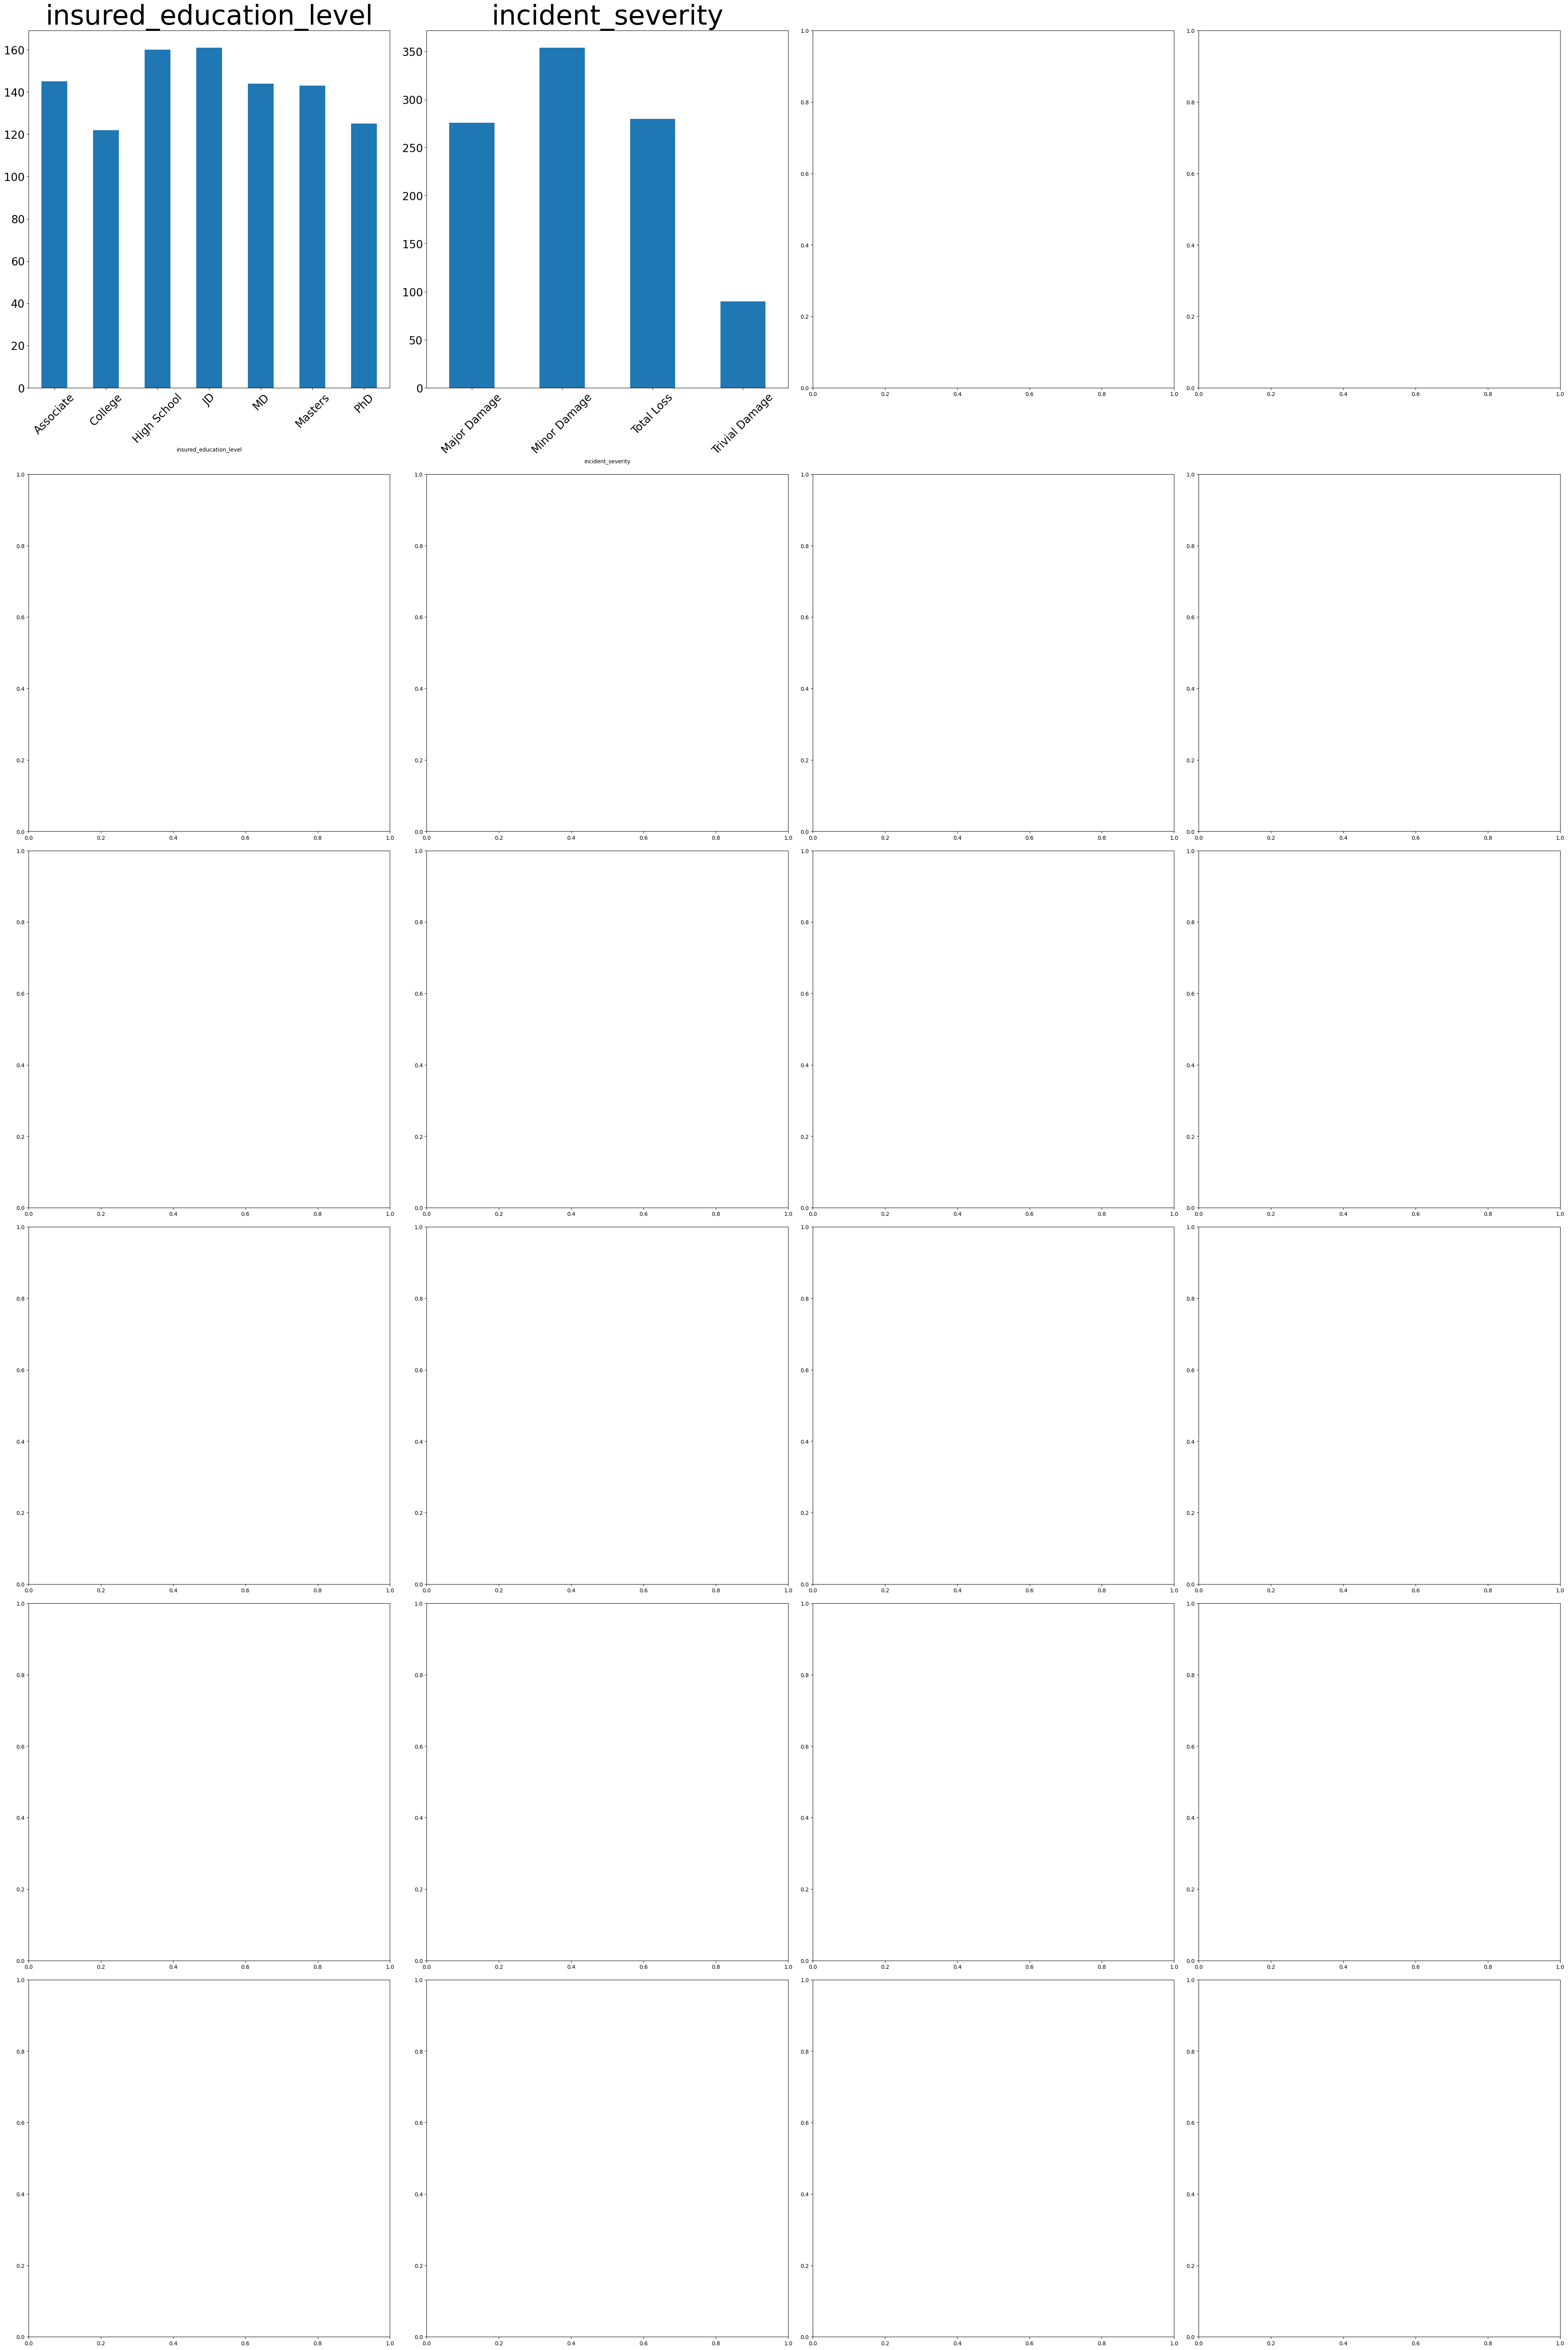

In [ ]:
#ordinal
fig, ax = plt.subplots(6, 4, figsize=(40,60), constrained_layout=True)
for i in range(6):
    for j in range(4):
        if 4*i + j < len(ord_col):
            df[ord_col[4*i + j]].value_counts().sort_index().plot.bar(ax=ax[i, j])
            ax[i, j].tick_params('x', rotation=45)
            ax[i, j].tick_params(labelsize=20)
            ax[i, j].set_title(ord_col[4*i + j], size=50)

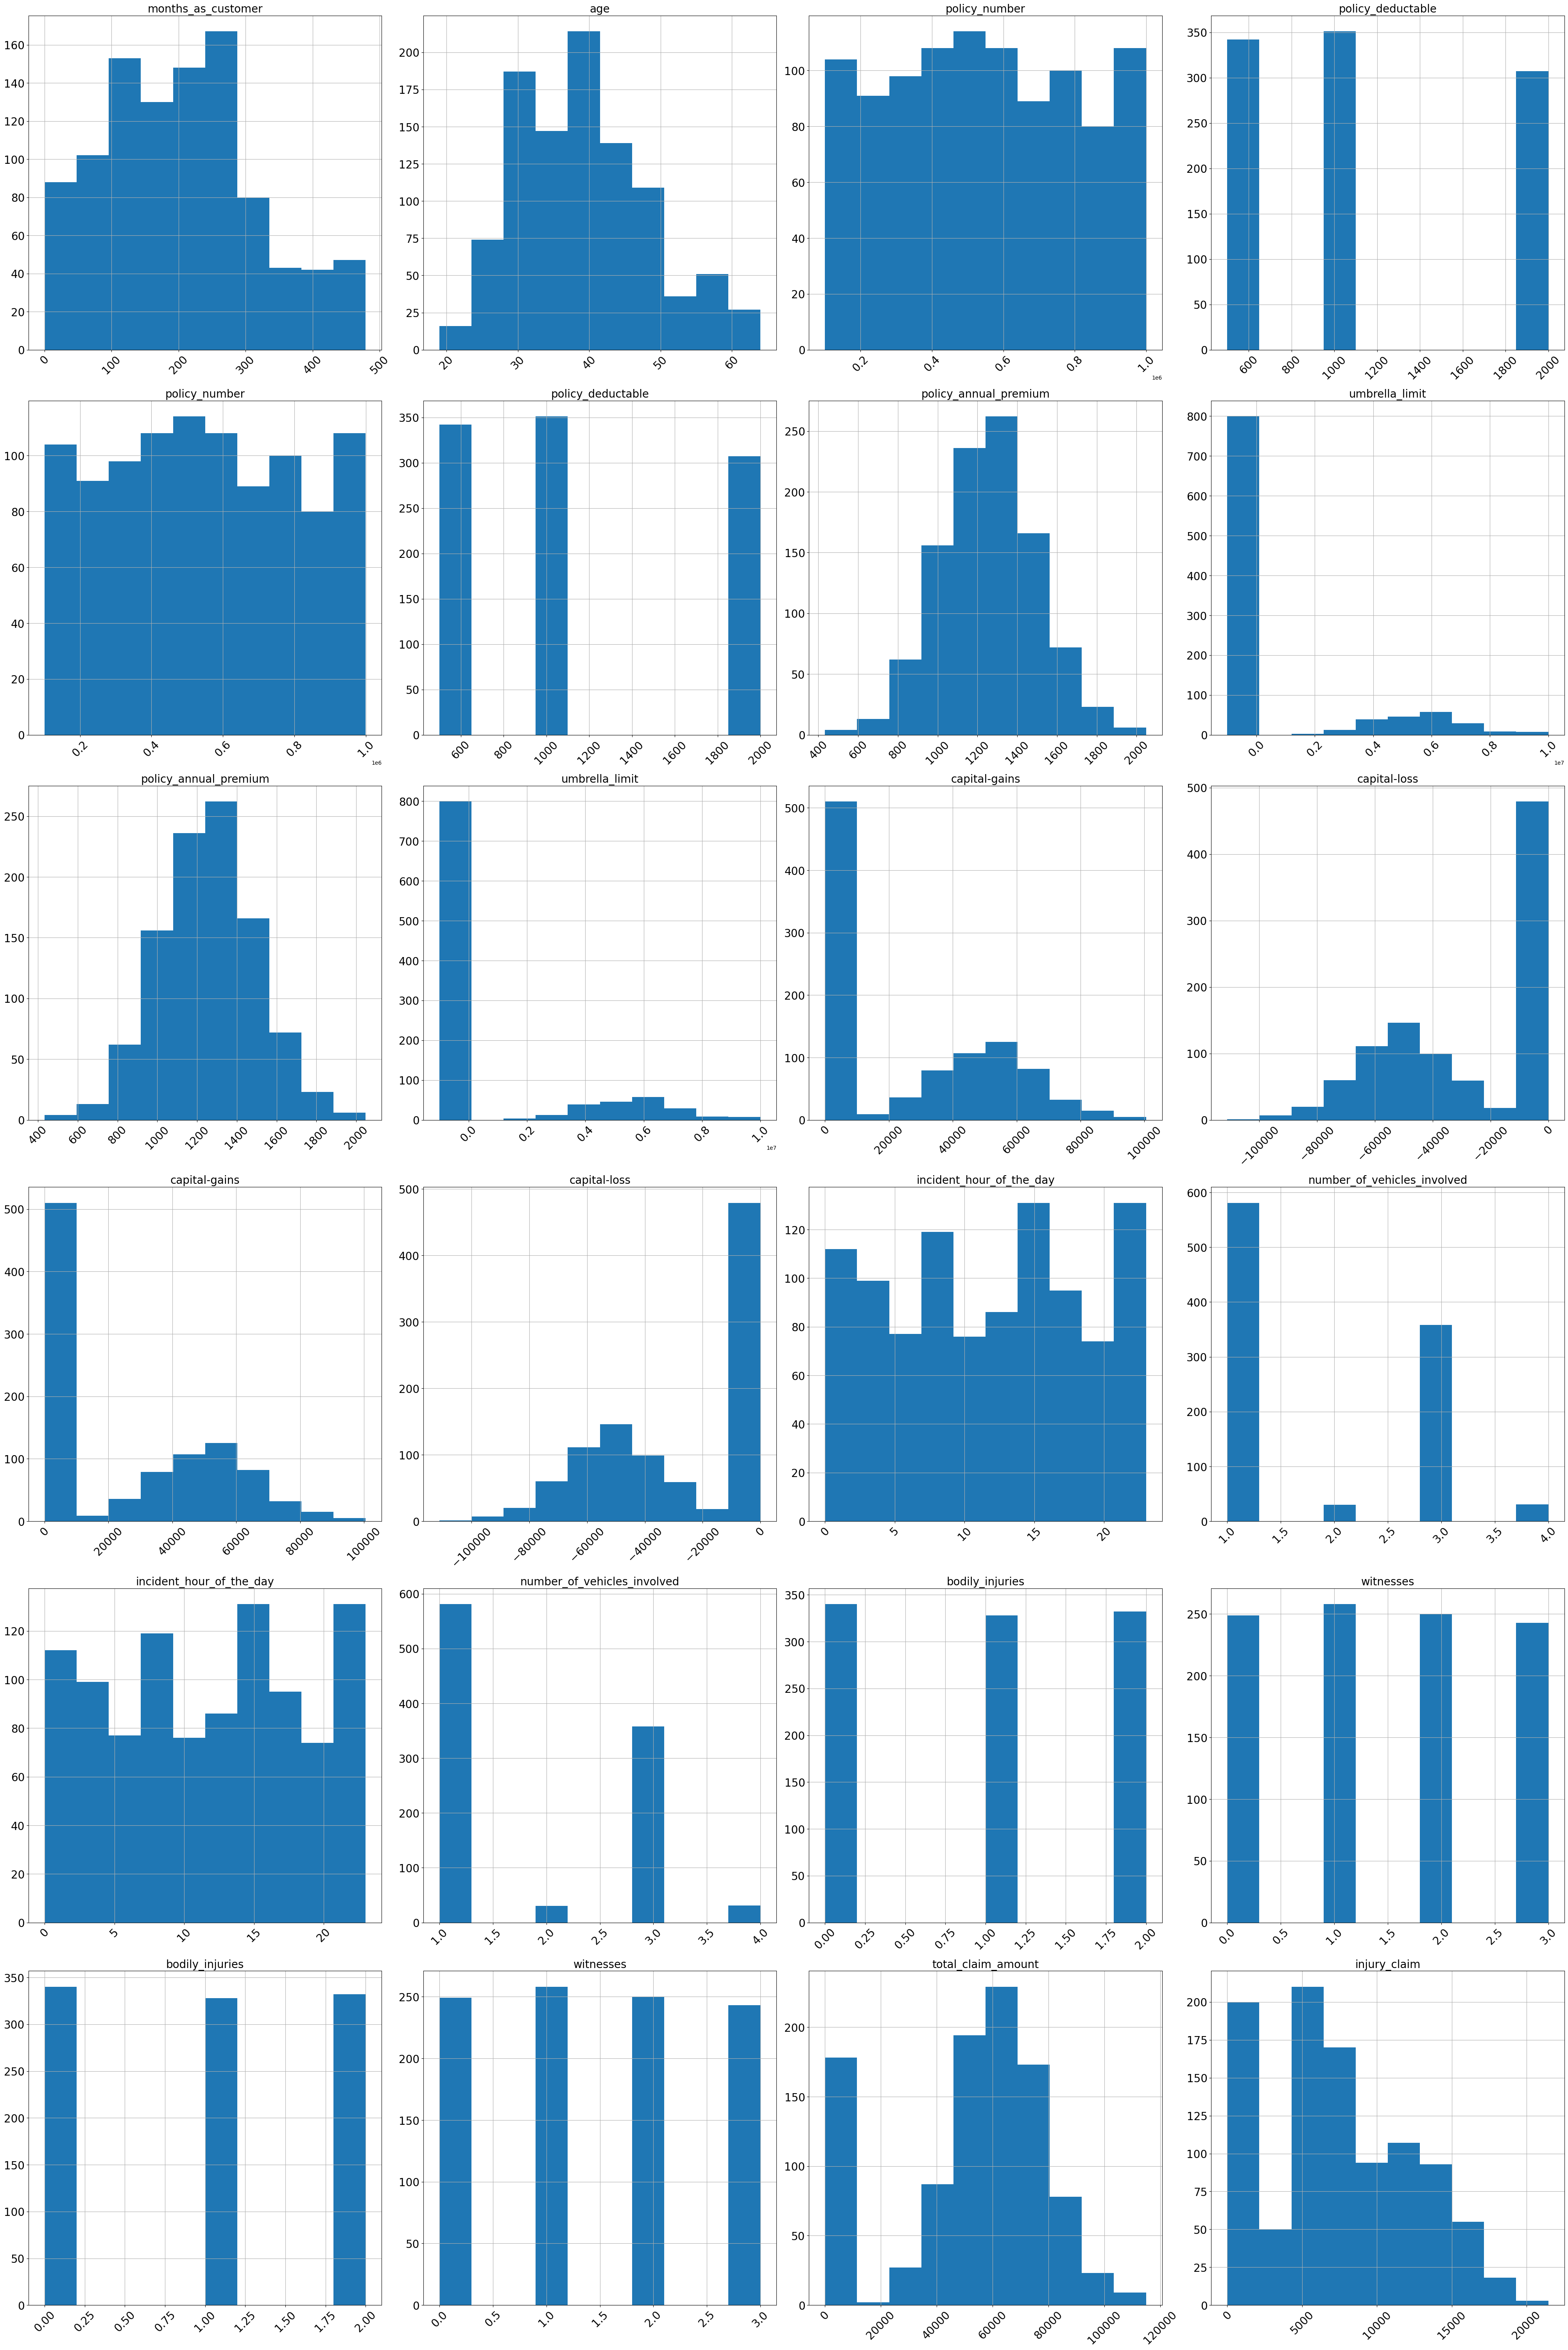

In [ ]:
#numerik
fig, ax = plt.subplots(6, 4, figsize=(40,60), constrained_layout=True)
for i in range(6):
    for j in range(4):
        if 2*i + j < len(num_col):
            df[num_col[2*i + j]].hist(bins=10, ax=ax[i, j])
            ax[i, j].tick_params('x', rotation=45)
            ax[i, j].tick_params(labelsize=20)
            ax[i, j].set_title(num_col[2*i + j],size=20)

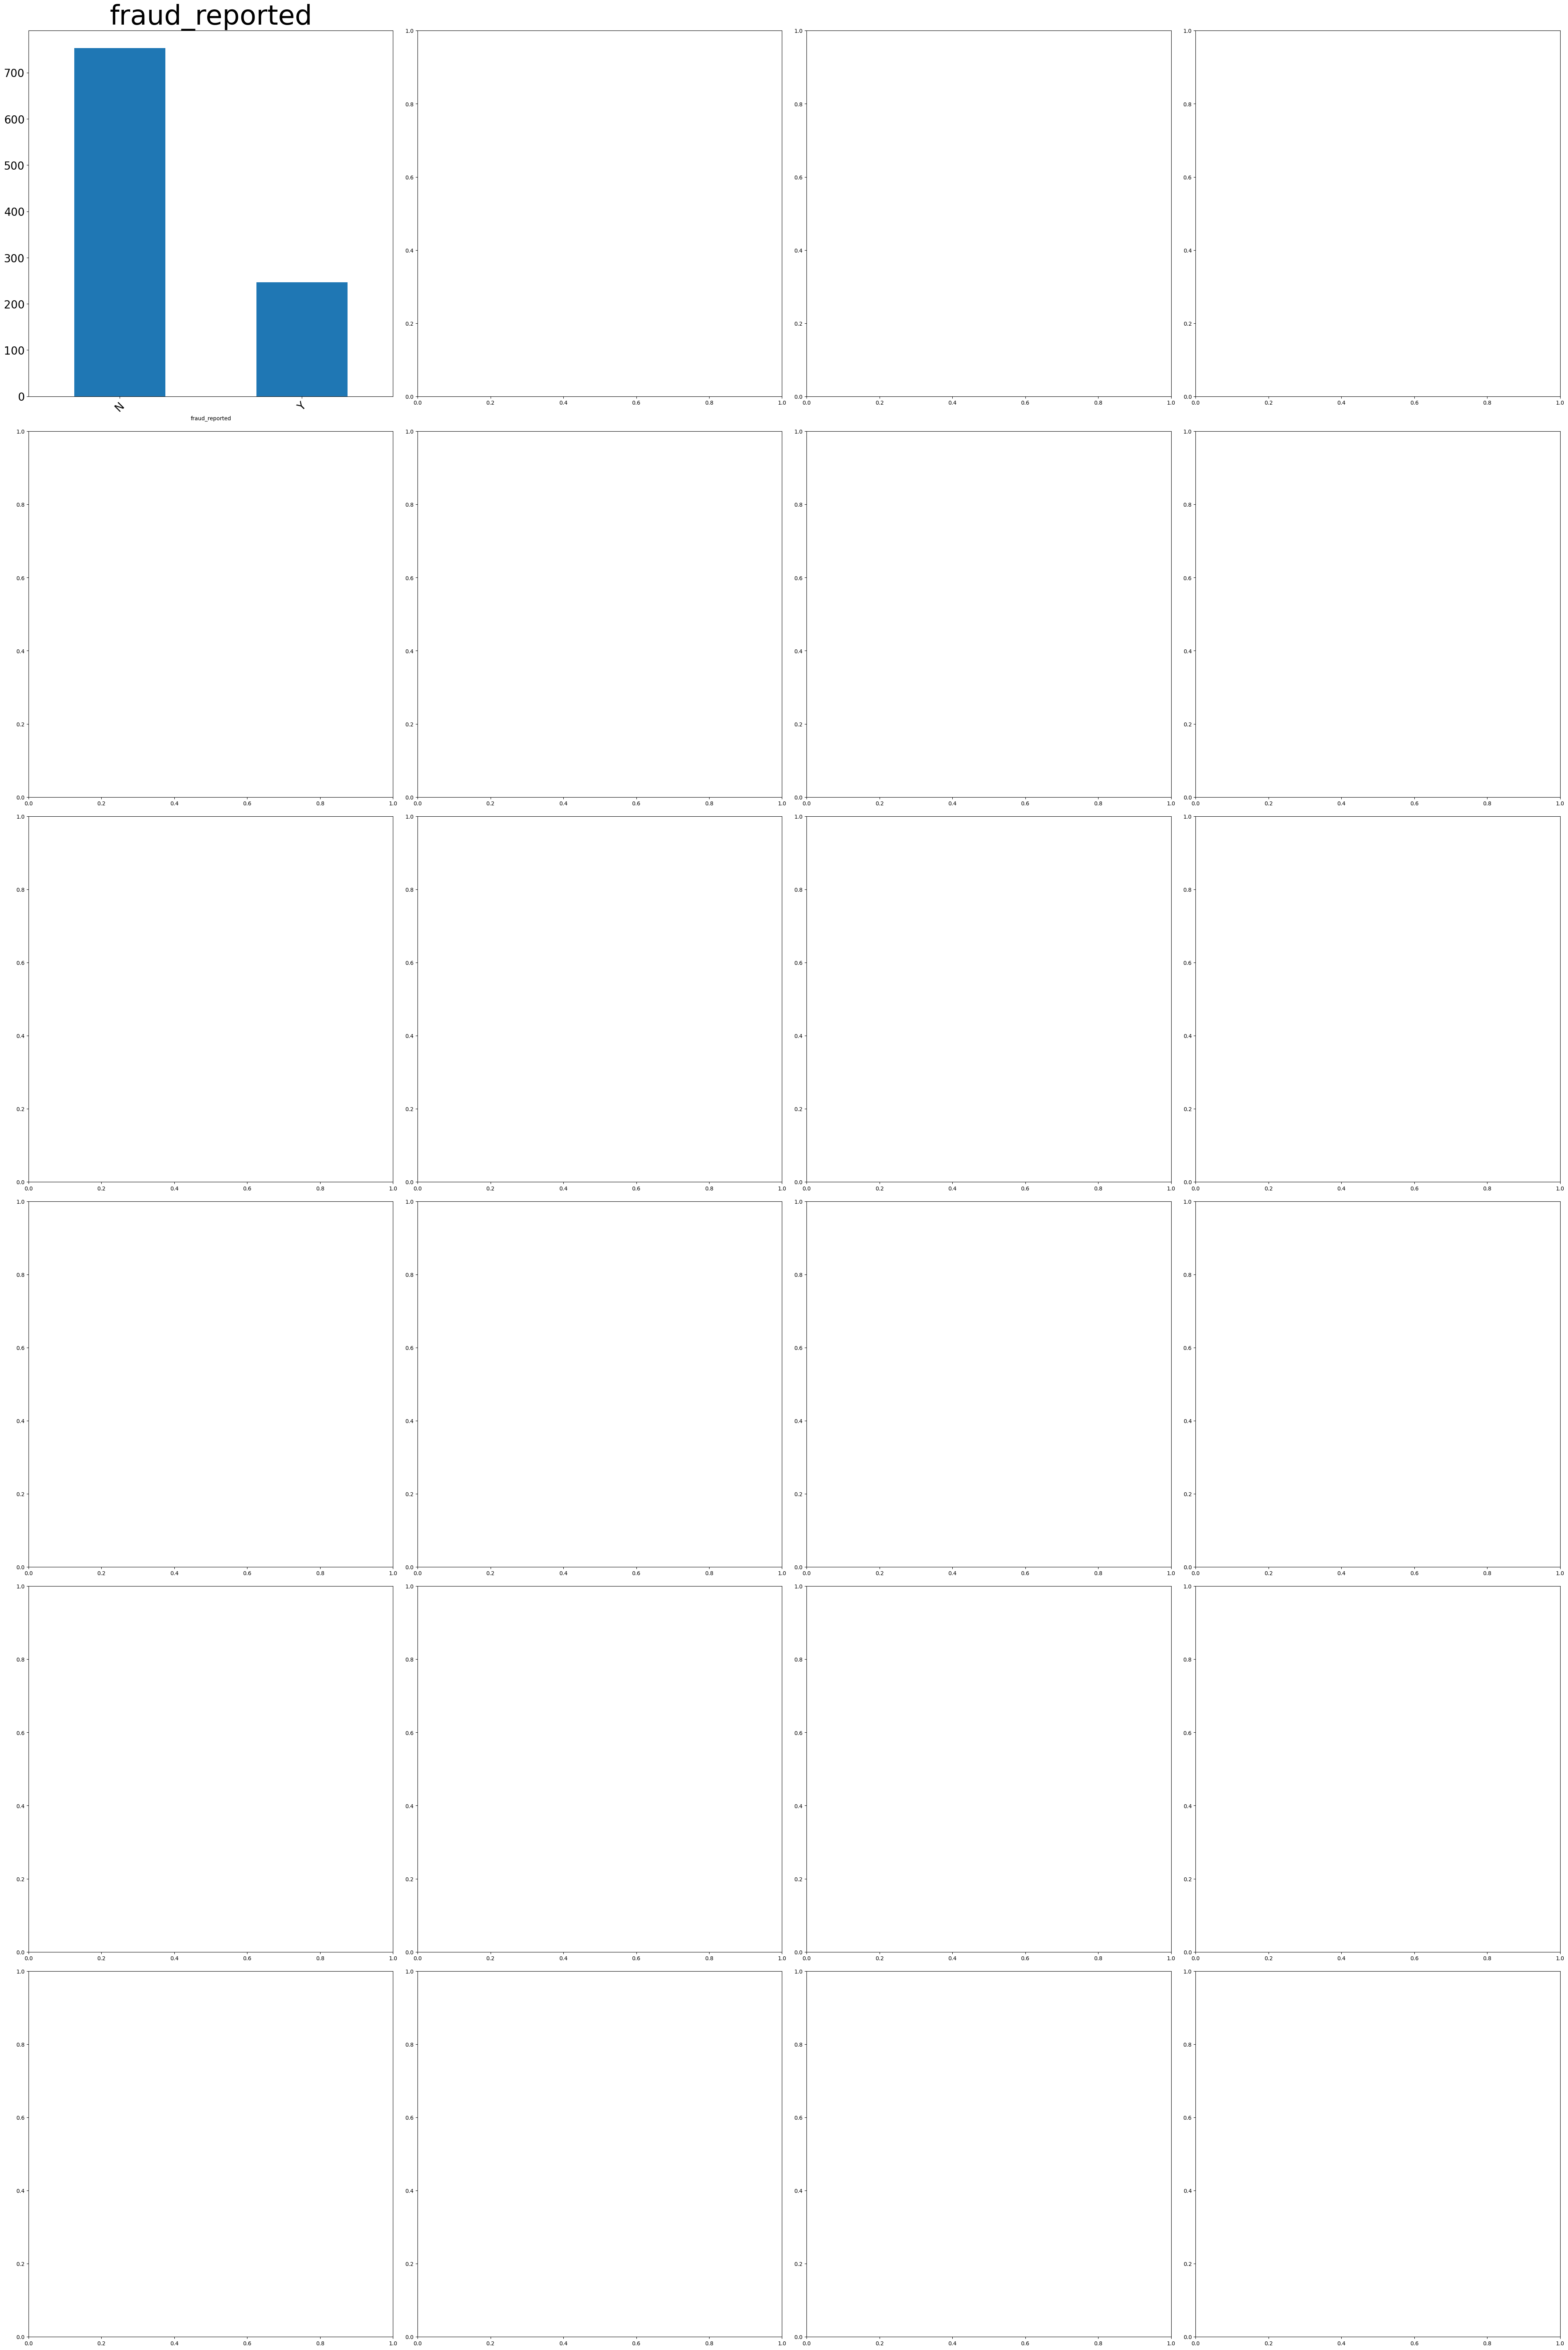

In [ ]:
#respon
fig, ax = plt.subplots(6, 4, figsize=(40,60), constrained_layout=True)
for i in range(6):
    for j in range(4):
        if 4*i + j < len(respon):
            df[respon[4*i + j]].value_counts().sort_index().plot.bar(ax=ax[i, j])
            ax[i, j].tick_params('x', rotation=45)
            ax[i, j].tick_params(labelsize=20)
            ax[i, j].set_title(respon[4*i + j], size=50)

PreProcessing Data (Pemilihan Variabel, Penanganan Missing Values dan Outliers)

In [ ]:
# Delete the specified columns from the DataFrame
columns_to_delete = ['policy_number', 'insured_zip', 'insured_relationship', 'incident_location', 'auto_make']
df.drop(columns=columns_to_delete, inplace=True)

# Display the first few rows to check the result
df.head()

months_as_customer  age policy_bind_date policy_state policy_csl  \
0                 328   48       2014-10-17           OH    250/500   
1                 228   42       2006-06-27           IN    250/500   
2                 134   29       2000-09-06           OH    100/300   
3                 256   41       1990-05-25           IL    250/500   
4                 228   44       2014-06-06           IL   500/1000   

   policy_deductable  policy_annual_premium  umbrella_limit insured_sex  \
0               1000                1406.91               0        MALE   
1               2000                1197.22         5000000        MALE   
2               2000                1413.14         5000000      FEMALE   
3               2000                1415.74         6000000      FEMALE   
4               1000                1583.91         6000000        MALE   

  insured_education_level insured_occupation insured_hobbies  capital-gains  \
0                      MD       craft-repair        sleeping          53300   
1                      MD  machine-op-inspct         reading              0   
2                     PhD              sales     board-games          35100   
3                     PhD       armed-forces     board-games          48900   
4               Associate              sales     board-games          66000   

   capital-loss incident_date             incident_type   collision_type  \
0             0    2015-01-25  Single Vehicle Collision   Side Collision   
1             0    2015-01-21             Vehicle Theft                ?   
2             0    2015-02-22   Multi-vehicle Collision   Rear Collision   
3        -62400    2015-01-10  Single Vehicle Collision  Front Collision   
4        -46000    2015-02-17             Vehicle Theft                ?   

  incident_severity authorities_contacted incident_state incident_city  \
0      Major Damage                Police             SC      Columbus   
1      Minor Damage                Police             VA     Riverwood   
2      Minor Damage                Police             NY      Columbus   
3      Major Damage                Police             OH     Arlington   
4      Minor Damage                   NaN             NY     Arlington   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim auto_model  auto_year  \
0          6510           13020          52080        92x       2004   
1           780             780           3510       E400       2007   
2          7700            3850          23100        RAM       2007   
3          6340            6340          50720      Tahoe       2014   
4          1300             650           4550        RSX       2009   

  fraud_reported  _c39  
0              Y   NaN  
1              Y   NaN  
2              N   NaN  
3              Y   NaN  
4              N   NaN

In [ ]:
#Cek Missing Value 'Nan'
columns_with_nan = df.columns[df.isnull().any()].tolist()
nan_counts = df.isnull().sum()
entries_with_nan = {
    column: df.index[df[column].isnull()].tolist() for column in columns_with_nan
}

print("Columns containing NaN:", columns_with_nan)
print("\nCounts of NaN in each column:")
print(nan_counts[nan_counts > 0])
print("\nEntries with NaN in each column:")
for column, rows in entries_with_nan.items():
    print(f"{column}: {rows}")

Columns containing NaN: ['authorities_contacted', '_c39']

Counts of NaN in each column:
authorities_contacted      91
_c39                     1000
dtype: int64

Entries with NaN in each column:
authorities_contacted: [4, 13, 27, 37, 51, 52, 57, 69, 78, 81, 83, 88, 92, 95, 98, 99, 105, 114, 141, 142, 157, 169, 174, 179, 190, 197, 211, 217, 242, 244, 248, 260, 271, 287, 298, 332, 333, 343, 362, 365, 366, 373, 395, 409, 410, 414, 439, 443, 444, 452, 473, 490, 533, 538, 585, 624, 635, 648, 674, 677, 686, 702, 711, 721, 726, 739, 782, 783, 790, 799, 804, 811, 813, 820, 832, 835, 837, 840, 871, 887, 892, 893, 894, 896, 899, 916, 940, 942, 950, 953, 994]
_c39: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 8

In [ ]:
#Olah Missing Value 'Nan'
df = df.drop(columns=['_c39'])

# Replace missing values (NaN) with "No Contact" in 'authorities_contacted' column
df['authorities_contacted'].fillna("No Contact", inplace=True)

<ipython-input-10-fa20935f5687>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['authorities_contacted'].fillna("No Contact", inplace=True)


In [ ]:
# Validasi missing value 'Nan'
columns_with_nan = df.columns[df.isnull().any()].tolist()
print("Columns containing NaN:", columns_with_nan)

Columns containing NaN: []


In [ ]:
# Cek missing values '?'

columns_with_qmark = df.columns[df.isin(['?']).any()].tolist()
qcounts = df.isin(['?']).sum()
qmark_entries = {
    column: df.index[df[column] == '?'].tolist() for column in columns_with_qmark
}

print("Columns containing '?':", columns_with_qmark)
print("\nCounts of '?' in each column:")
print(qcounts[qcounts > 0])
print("\nEntries with '?' in each column:")
for column, rows in qmark_entries.items():
    print(f"{column}: {rows}")

Columns containing '?': ['collision_type', 'property_damage', 'police_report_available']

Counts of '?' in each column:
collision_type             178
property_damage            360
police_report_available    343
dtype: int64

Entries with '?' in each column:
collision_type: [1, 4, 13, 26, 27, 37, 48, 51, 52, 54, 57, 69, 78, 81, 82, 83, 88, 92, 95, 98, 99, 103, 105, 114, 127, 136, 141, 142, 157, 159, 160, 168, 169, 174, 179, 187, 190, 193, 196, 197, 199, 200, 202, 209, 210, 211, 217, 242, 244, 248, 252, 258, 260, 265, 271, 281, 282, 287, 289, 297, 298, 300, 303, 332, 333, 343, 362, 364, 365, 366, 373, 395, 398, 409, 410, 411, 414, 418, 437, 438, 439, 443, 444, 452, 456, 473, 474, 478, 490, 496, 511, 519, 524, 525, 527, 533, 538, 541, 548, 552, 553, 556, 557, 584, 585, 586, 596, 597, 603, 607, 614, 622, 624, 627, 635, 636, 637, 648, 656, 674, 675, 677, 681, 682, 686, 692, 695, 698, 702, 711, 719, 721, 723, 726, 739, 750, 775, 782, 783, 790, 799, 804, 811, 813, 818, 820, 832, 834, 835, 8

In [ ]:
# Convert "?" to NaN in the specified columns
columns_to_replace = ["property_damage", "collision_type", "police_report_available"]
df[columns_to_replace] = df[columns_to_replace].replace("?", np.nan)

# Now, fill NaN values with the mode of each column
for column in columns_to_replace:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

<ipython-input-13-dcb526299765>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)


In [ ]:
# Validasi missing value '?'
columns_with_qmark = df.columns[df.isin(['?']).any()].tolist()
print("Columns containing '?':", columns_with_qmark)

Columns containing '?': []


In [ ]:
# Penanganan Missing Values
from scipy.stats import zscore

# Function to delete outliers based on Z-score and track removed rows
def delete_outliers_zscore(df, threshold=3):
    # Create a copy to ensure we are modifying the DataFrame in place
    df_no_outliers = df.copy()

    # Store original indices
    original_indices = df.index

    # Loop through each numeric column and delete rows with outliers
    for column in df_no_outliers.select_dtypes(include=[float, int]):
        # Calculate Z-scores, dropping NaN values
        z_scores = zscore(df_no_outliers[column].dropna())

        # Filter rows: Keep rows within threshold or with NaN values
        df_no_outliers = df_no_outliers[(abs(z_scores) <= threshold) | (df_no_outliers[column].isna())]

    # Identify removed rows
    removed_indices = original_indices.difference(df_no_outliers.index)

    return df_no_outliers, removed_indices

# Delete outliers and track removed rows
df_no_outliers, removed_indices = delete_outliers_zscore(df)

# Print results
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after outlier removal:", df_no_outliers.shape)
print(f"Removed {len(removed_indices)} rows.")

# Display the indices of the removed rows
print("Indices of removed rows:", removed_indices.tolist())
df = df_no_outliers
df.head()

Original DataFrame shape: (1000, 34)
DataFrame shape after outlier removal: (988, 34)
Removed 12 rows.
Indices of removed rows: [88, 115, 229, 248, 430, 458, 500, 657, 700, 763, 807, 975]


months_as_customer  age policy_bind_date policy_state policy_csl  \
0                 328   48       2014-10-17           OH    250/500   
1                 228   42       2006-06-27           IN    250/500   
2                 134   29       2000-09-06           OH    100/300   
3                 256   41       1990-05-25           IL    250/500   
4                 228   44       2014-06-06           IL   500/1000   

   policy_deductable  policy_annual_premium  umbrella_limit insured_sex  \
0               1000                1406.91               0        MALE   
1               2000                1197.22         5000000        MALE   
2               2000                1413.14         5000000      FEMALE   
3               2000                1415.74         6000000      FEMALE   
4               1000                1583.91         6000000        MALE   

  insured_education_level insured_occupation insured_hobbies  capital-gains  \
0                      MD       craft-repair        sleeping          53300   
1                      MD  machine-op-inspct         reading              0   
2                     PhD              sales     board-games          35100   
3                     PhD       armed-forces     board-games          48900   
4               Associate              sales     board-games          66000   

   capital-loss incident_date             incident_type   collision_type  \
0             0    2015-01-25  Single Vehicle Collision   Side Collision   
1             0    2015-01-21             Vehicle Theft   Rear Collision   
2             0    2015-02-22   Multi-vehicle Collision   Rear Collision   
3        -62400    2015-01-10  Single Vehicle Collision  Front Collision   
4        -46000    2015-02-17             Vehicle Theft   Rear Collision   

  incident_severity authorities_contacted incident_state incident_city  \
0      Major Damage                Police             SC      Columbus   
1      Minor Damage                Police             VA     Riverwood   
2      Minor Damage                Police             NY      Columbus   
3      Major Damage                Police             OH     Arlington   
4      Minor Damage            No Contact             NY     Arlington   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1              NO   
2                         7                            3              NO   
3                         5                            1              NO   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                      NO                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim auto_model  auto_year  \
0          6510           13020          52080        92x       2004   
1           780             780           3510       E400       2007   
2          7700            3850          23100        RAM       2007   
3          6340            6340          50720      Tahoe       2014   
4          1300             650           4550        RSX       2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N

In [ ]:
# Pengolahan Variabel

# Convert 'policy_bind_date' and 'incident_date' to datetime format (if they're not already)
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])

# Calculate the duration in days between 'policy_bind_date' and 'incident_date'
df['Duration'] = (df['incident_date'] - df['policy_bind_date']).dt.days

# Display the first few rows to check the 'Duration' column
df[['policy_bind_date', 'incident_date', 'Duration']].head()

policy_bind_date incident_date  Duration
0       2014-10-17    2015-01-25       100
1       2006-06-27    2015-01-21      3130
2       2000-09-06    2015-02-22      5282
3       1990-05-25    2015-01-10      8996
4       2014-06-06    2015-02-17       256

In [ ]:
# Delete policy bind date and incident date columns
df = df.drop(columns=['policy_bind_date', 'incident_date'])

Splitting Data

In [ ]:
# Splitting the dataset into training and testing sets
y_1 = df['fraud_reported']
y = y_1.replace({'Y': 1, 'N': 0})
X = df.drop(['fraud_reported'], axis = 1)

<ipython-input-18-5cd892f6a18f>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y_1.replace({'Y': 1, 'N': 0})


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)

Pre-Pipeline

In [ ]:
nominal_columns = ['policy_state', 'policy_csl', 'insured_sex', 'insured_occupation', 'insured_hobbies', 'incident_type', 'collision_type', 'authorities_contacted',
                   'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_model']
ordinal_columns = ['insured_education_level', 'incident_severity']
numerical_columns = ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss',
                   'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
                   'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'Duration', 'auto_year']

In [ ]:
# Convert all values in categorical columns to strings before fitting the pipeline
for col in nominal_columns:
    X_train[col] = X_train[col].astype(str) #Convert the entire column to string type
    X_test[col] = X_test[col].astype(str) #Convert the entire column to string type

In [ ]:
#State Urutan Ordinal
iel_order = ['Associate', 'College', 'High School', 'Masters', 'JD', 'MD', 'PhD']
is_order = ['Trivial Damage', 'Minor Damage', 'Major Damage', 'Total Loss']

In [ ]:
# Transformers for numerical data
numerical_transformer = Pipeline(steps=[('Scaler', MinMaxScaler())])

# Transformers for categorical data (nominal)
nominal_transformer = Pipeline(steps=[
    ('Onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Transformers for categorical data (ordinal)
ordinal_transformer = Pipeline(steps=[
    ('Ordinal', OrdinalEncoder(categories=[iel_order, is_order])), # Use flat lists for categories
    ('Scaler', MinMaxScaler())
])

### Combine pipelines using ColumnTransformer
preprocessing = ColumnTransformer(transformers=[('Numerical', numerical_transformer, numerical_columns),
                                                ('Nominal', nominal_transformer, nominal_columns),
                                                ('Ordinal', ordinal_transformer, ordinal_columns)],
                                  remainder='passthrough')

Pipeline:


*   Random Forest
*   Logistic Regression
*   Support Machine Vector
*   XGBoost



Random Forest (sudah revisi)

In [ ]:
RFpipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessing),
    ('smote', SMOTE(random_state=42)),  # Menangani data imbalance
    ('classifier', RandomForestClassifier())
])

In [ ]:
# Define the parameter grid for the Random Forest model
param_rf = {'max_depth': np.arange(5, 10),
            'min_samples_leaf': (50, 100, 150, 200, 250, 300, 350, 400, 450, 500),
            'min_samples_split': (50, 100, 150, 200, 250, 300, 350, 400, 450, 500)}

# Create GridSearchCV object
rf_grid = GridSearchCV(RandomForestClassifier(n_estimators=250,
                                              criterion='entropy',
                                              n_jobs=-1),
                       param_grid=param_rf, scoring='roc_auc',cv=5)

rf_pipeline = ImbPipeline([
    ('preprocessor', preprocessing),
    ('oversampling', SMOTE(random_state=1)),
    ('grid_search', rf_grid)
])

rf_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical',
                                                  Pipeline(steps=[('Scaler',
                                                                   MinMaxScaler())]),
                                                  ['months_as_customer', 'age',
                                                   'policy_deductable',
                                                   'policy_annual_premium',
                                                   'umbrella_limit',
                                                   'capital-gains',
                                                   'capital-loss',
                                                   'incident_hour_of_the_day',
                                                   'number_of_vehicles_involved',
                                                   'bodily_injuries',
                                                   'witnesses...
                                                   'incident_severity'])])),
                ('oversampling', SMOTE(random_state=1)),
                ('grid_search',
                 GridSearchCV(cv=5,
                              estimator=RandomForestClassifier(criterion='entropy',
                                                               n_estimators=250,
                                                               n_jobs=-1),
                              param_grid={'max_depth': array([5, 6, 7, 8, 9]),
                                          'min_samples_leaf': (50, 100, 150,
                                                               200, 250, 300,
                                                               350, 400, 450,
                                                               500),
                                          'min_samples_split': (50, 100, 150,
                                                                200, 250, 300,
                                                                350, 400, 450,
                                                                500)},
                              scoring='roc_auc'))])

In [ ]:
# Get the best parameters and the best score from GridSearchCV
best_params = rf_pipeline.named_steps['grid_search'].best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'max_depth': 6, 'min_samples_leaf': 50, 'min_samples_split': 100}


In [ ]:
train_rf = rf_pipeline.predict(X_test)
print(classification_report(y_test, train_rf))

              precision    recall  f1-score   support

           0       0.82      0.66      0.73       149
           1       0.35      0.55      0.43        49

    accuracy                           0.63       198
   macro avg       0.58      0.60      0.58       198
weighted avg       0.70      0.63      0.65       198



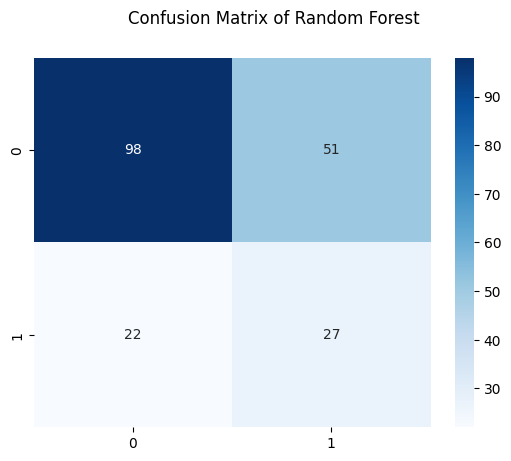

In [ ]:
rfcm = confusion_matrix(y_test, train_rf)
sns.heatmap(rfcm, annot=True, fmt="d", cmap="Blues")
plt.suptitle("Confusion Matrix of Random Forest")
plt.show()

In [ ]:
#calculate AUC ROC
prob_rf = rf_pipeline.predict_proba(X_test)[:,1]
roc_auc= roc_auc_score(y_test, prob_rf)

tn, fp, fn, tp = rfcm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print("ROC AUC Score:", roc_auc)
print('Specificity:', specificity)
print('Sensitivity:', sensitivity)

ROC AUC Score: 0.6430625941651829
Specificity: 0.6577181208053692
Sensitivity: 0.5510204081632653


In [ ]:
model_rf = RandomForestClassifier(n_estimators=250,criterion='entropy',
                                  max_depth = 6,
                                  min_samples_leaf = 50,
                                  min_samples_split = 50
)
rf_pipelines = ImbPipeline([('preprocessing', preprocessing),
                            ('oversampling', SMOTE(random_state=1)),
                            ('model', model_rf)])

roc_auc = []
specificity = []
sensitivity = []

for i in range(5):
    rf_pipelines.fit(X_train, y_train)

    train_rf = rf_pipelines.predict(X_test)

    # Calculate ROC AUC
    probabilities = rf_pipelines.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, probabilities)

    cm = confusion_matrix(y_test, train_rf)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)

    print(f"iteration{i+1}")
    print(f"ROC_AUC = {roc_auc}")
    print(f"Specificity = {specificity}")
    print(f"Sensitivity = {sensitivity}")
    print(" ")

#summary of results
print(f"Average ROC_AUC = {np.mean(roc_auc)}")
print(f"Average Specificity = {np.mean(specificity)}")
print(f"Average Sensitivity = {np.mean(sensitivity)}")

iteration1
ROC_AUC = 0.6566223804958226
Specificity = 0.738255033557047
Sensitivity = 0.5714285714285714
 
iteration2
ROC_AUC = 0.6742911929872619
Specificity = 0.7583892617449665
Sensitivity = 0.5714285714285714
 
iteration3
ROC_AUC = 0.6445692370908096
Specificity = 0.7248322147651006
Sensitivity = 0.5102040816326531
 
iteration4
ROC_AUC = 0.6519654841802492
Specificity = 0.7181208053691275
Sensitivity = 0.5510204081632653
 
iteration5
ROC_AUC = 0.660594439117929
Specificity = 0.6778523489932886
Sensitivity = 0.5714285714285714
 
Average ROC_AUC = 0.660594439117929
Average Specificity = 0.6778523489932886
Average Sensitivity = 0.5714285714285714


Logistic Regression

In [ ]:
# Define hyperparameter grid for Logistic Regression
param_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],       # Regularization types
    'solver': ['liblinear', 'saga'] # Solvers supporting l1 and l2 penalties
}

In [ ]:
# GridSearchCV for Logistic Regression
lr_grid = GridSearchCV(
    LogisticRegression(max_iter=500, random_state=1),
    param_grid=param_lr,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Define the pipeline
lr_pipeline = ImbPipeline([
    ('preprocessor', preprocessing),  # Replace with your actual preprocessing steps
    ('oversampling', SMOTE(random_state=1)),  # Handle class imbalance
    ('grid_search', lr_grid)
])

In [ ]:
# Fit the pipeline
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical',
                                                  Pipeline(steps=[('Scaler',
                                                                   MinMaxScaler())]),
                                                  ['months_as_customer', 'age',
                                                   'policy_deductable',
                                                   'policy_annual_premium',
                                                   'umbrella_limit',
                                                   'capital-gains',
                                                   'capital-loss',
                                                   'incident_hour_of_the_day',
                                                   'number_of_vehicles_involved',
                                                   'bodily_injuries',
                                                   'witnesses...
                                                                                               'Damage',
                                                                                               'Total '
                                                                                               'Loss']])),
                                                                  ('Scaler',
                                                                   MinMaxScaler())]),
                                                  ['insured_education_level',
                                                   'incident_severity'])])),
                ('oversampling', SMOTE(random_state=1)),
                ('grid_search',
                 GridSearchCV(cv=5,
                              estimator=LogisticRegression(max_iter=500,
                                                           random_state=1),
                              n_jobs=-1,
                              param_grid={'C': [0.01, 0.1, 1, 10, 100],
                                          'penalty': ['l1', 'l2'],
                                          'solver': ['liblinear', 'saga']},
                              scoring='roc_auc'))])

In [ ]:
# Mengakses hyperparameter terbaik dari GridSearchCV
best_lrparams = lr_pipeline.named_steps['grid_search'].best_params_
print("Best hyperparameters:", best_lrparams)

Best hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}


In [ ]:
train_lr = lr_pipeline.predict(X_test)
print(classification_report(y_test, train_lr))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       149
           1       0.34      0.43      0.38        49

    accuracy                           0.66       198
   macro avg       0.57      0.58      0.57       198
weighted avg       0.68      0.66      0.67       198



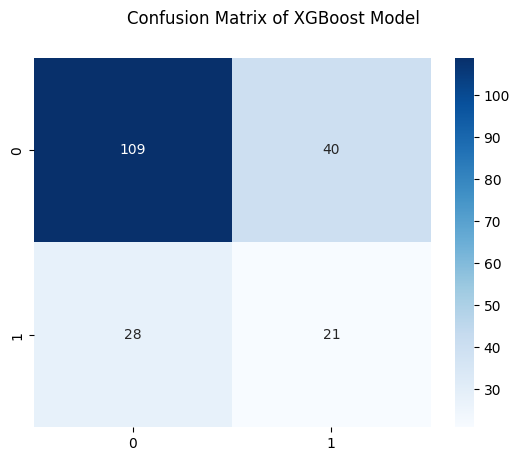

In [ ]:
LRcm = confusion_matrix(y_test, train_lr)
sns.heatmap(LRcm, annot=True, fmt="d", cmap="Blues")
plt.suptitle("Confusion Matrix of XGBoost Model")
plt.show()

In [ ]:
# Calculate ROC AUC
probabilities = lr_pipeline.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, probabilities)

tn, fp, fn, tp = LRcm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print("ROC AUC Score:", roc_auc)
print('Specificity:', specificity)
print('Sensitivity:', sensitivity)


ROC AUC Score: 0.6189563073551567
Specificity: 0.7315436241610739
Sensitivity: 0.42857142857142855


In [ ]:
model_lr = LogisticRegression(
    max_iter=500,
    random_state=1,
    C=best_lrparams['C'],
    penalty=best_lrparams['penalty'],
    solver=best_lrparams['solver']
)

lr_final_pipeline = ImbPipeline([
    ('preprocessor', preprocessing),  # Replace with your actual preprocessing steps
    ('oversampling', SMOTE(random_state=1)),  # Handle class imbalance
    ('model', model_lr)
])

In [ ]:
roc_auc_scores = []
specificity_scores = []
sensitivity_scores = []

for i in range(5):
    # Train the pipeline
    lr_final_pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = lr_final_pipeline.predict(X_test)

    # Calculate ROC AUC
    probabilities = lr_final_pipeline.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, probabilities)

        # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Calculate Specificity and Sensitivity
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)

    # Store metrics
    roc_auc_scores.append(roc_auc)
    specificity_scores.append(specificity)
    sensitivity_scores.append(sensitivity)

    # Print iteration results
    print(f"Iteration {i + 1}")
    print(f"ROC AUC = {roc_auc:.4f}")
    print(f"Specificity = {specificity:.4f}")
    print(f"Sensitivity = {sensitivity:.4f}")
    print(" ")

Iteration 1
ROC AUC = 0.6190
Specificity = 0.7315
Sensitivity = 0.4286
 
Iteration 2
ROC AUC = 0.6190
Specificity = 0.7315
Sensitivity = 0.4286
 
Iteration 3
ROC AUC = 0.6190
Specificity = 0.7315
Sensitivity = 0.4286
 
Iteration 4
ROC AUC = 0.6190
Specificity = 0.7315
Sensitivity = 0.4286
 
Iteration 5
ROC AUC = 0.6190
Specificity = 0.7315
Sensitivity = 0.4286
 


In [ ]:
# Summary of results
print("Average ROC AUC:", np.mean(roc_auc_scores))
print("Average Specificity:", np.mean(specificity_scores))
print("Average Sensitivity:", np.mean(sensitivity_scores))

Average ROC AUC: 0.6189563073551567
Average Specificity: 0.7315436241610739
Average Sensitivity: 0.42857142857142855


Support Machine Vector

In [ ]:
# Define the parameter grid for SVM model
param_svm = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Type of kernel
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficient for 'rbf', 'poly', or 'sigmoid'
    'degree': [2, 3, 4],  # Only for 'poly' kernel (polynomial degree)
    'class_weight': [None, 'balanced'],  # Handle class imbalance
    'max_iter': [100, 200, 500, -1]  # Maximum number of iterations for solver (-1 means no limit)
}

# Define the SVM GridSearchCV
svm_grid = GridSearchCV(
    estimator=SVC(),  # Instantiate the SVC class (no need to reference via grid_search_svc)
    param_grid=param_svm,
    cv=5,  # 5-fold cross-validation
    scoring='roc_auc',  # Using ROC AUC as the evaluation metric
    n_jobs=-1,  # Use all available cores
    verbose=1  # Show progress
)

# Create the pipeline with preprocessing steps
svm_pipeline = ImbPipeline([
    ('preprocessing', preprocessing),  # Feature scaling (StandardScaler or other pre-processing steps)
    ('oversampling', SMOTE(random_state=1)),  # SMOTE for balancing classes
    ('svm_grid', svm_grid)  # Apply the GridSearchCV for SVC parameter tuning
])

# Fit the pipeline to the training data
svm_pipeline.fit(X_train, y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical',
                                                  Pipeline(steps=[('Scaler',
                                                                   MinMaxScaler())]),
                                                  ['months_as_customer', 'age',
                                                   'policy_deductable',
                                                   'policy_annual_premium',
                                                   'umbrella_limit',
                                                   'capital-gains',
                                                   'capital-loss',
                                                   'incident_hour_of_the_day',
                                                   'number_of_vehicles_involved',
                                                   'bodily_injuries',
                                                   'witnesse...
                                                  ['insured_education_level',
                                                   'incident_severity'])])),
                ('oversampling', SMOTE(random_state=1)),
                ('svm_grid',
                 GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                              param_grid={'C': [0.1, 1, 10, 100],
                                          'class_weight': [None, 'balanced'],
                                          'degree': [2, 3, 4],
                                          'gamma': ['scale', 'auto', 0.01, 0.1,
                                                    1],
                                          'kernel': ['linear', 'rbf', 'poly'],
                                          'max_iter': [100, 200, 500, -1]},
                              scoring='roc_auc', verbose=1))])

In [ ]:
# Mengakses hyperparameter terbaik dari GridSearchCV
best_params_svc = svm_pipeline.named_steps['svm_grid'].best_params_
print("Best hyperparameters:", best_params_svc)

Best hyperparameters: {'C': 0.1, 'class_weight': 'balanced', 'degree': 2, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 500}


In [ ]:
pd.DataFrame(svm_pipeline.named_steps['svm_grid'].cv_results_).sort_values("rank_test_score", ascending=True)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
234       0.212805      0.012909         0.151551        0.020589      0.1   
294       0.230241      0.011825         0.172174        0.022849      0.1   
354       0.129504      0.022171         0.086441        0.004763      0.1   
114       0.119297      0.005403         0.091388        0.007270      0.1   
55        0.126432      0.016185         0.090735        0.010301      0.1   
..             ...           ...              ...             ...      ...   
601       0.067012      0.004168         0.017003        0.006470      1.0   
613       0.037235      0.003716         0.012035        0.002244      1.0   
625       0.034076      0.002001         0.011682        0.001688      1.0   
709       0.062895      0.002680         0.017422        0.004141      1.0   
685       0.033799      0.001561         0.012031        0.001514      1.0   

    param_class_weight  param_degree param_gamma param_kernel  param_max_iter  \
234           balanced             2           1          rbf             500   
294           balanced             3           1          rbf             500   
354           balanced             4           1          rbf             500   
114               None             3           1          rbf             500   
55                None             2           1          rbf              -1   
..                 ...           ...         ...          ...             ...   
601           balanced             3       scale       linear             200   
613           balanced             3        auto       linear             200   
625           balanced             3        0.01       linear             200   
709           balanced             4           1       linear             200   
685           balanced             4        0.01       linear             200   

                                                params  split0_test_score  \
234  {'C': 0.1, 'class_weight': 'balanced', 'degree...           0.990126   
294  {'C': 0.1, 'class_weight': 'balanced', 'degree...           0.990126   
354  {'C': 0.1, 'class_weight': 'balanced', 'degree...           0.990126   
114  {'C': 0.1, 'class_weight': None, 'degree': 3, ...           0.990126   
55   {'C': 0.1, 'class_weight': None, 'degree': 2, ...           0.990126   
..                                                 ...                ...   
601  {'C': 1, 'class_weight': 'balanced', 'degree':...           0.602311   
613  {'C': 1, 'class_weight': 'balanced', 'degree':...           0.602311   
625  {'C': 1, 'class_weight': 'balanced', 'degree':...           0.602311   
709  {'C': 1, 'class_weight': 'balanced', 'degree':...           0.602311   
685  {'C': 1, 'class_weight': 'balanced', 'degree':...           0.602311   

     split1_test_score  split2_test_score  split3_test_score  \
234           0.973249           1.000000           1.000000   
294           0.973249           1.000000           1.000000   
354           0.973249           1.000000           1.000000   
114           0.973179           1.000000           1.000000   
55            0.973179           1.000000           1.000000   
..                 ...                ...                ...   
601           0.594608           0.575595           0.658569   
613           0.594608           0.575595           0.658569   
625           0.594608           0.575595           0.658569   
709           0.594608           0.575595           0.658569   
685           0.594608           0.575595           0.658569   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
234           1.000000         0.992675        0.010439                1  
294           1.000000         0.992675        0.010439                1  
354           1.000000         0.992675        0.010439                1  
114           1.000000         0.992661        0.010465                4  
55            1.000000    

In [ ]:
train_svc = svm_pipeline.predict(X_test)
print(classification_report(y_test, train_svc))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       149
           1       0.00      0.00      0.00        49

    accuracy                           0.75       198
   macro avg       0.38      0.50      0.43       198
weighted avg       0.57      0.75      0.65       198



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


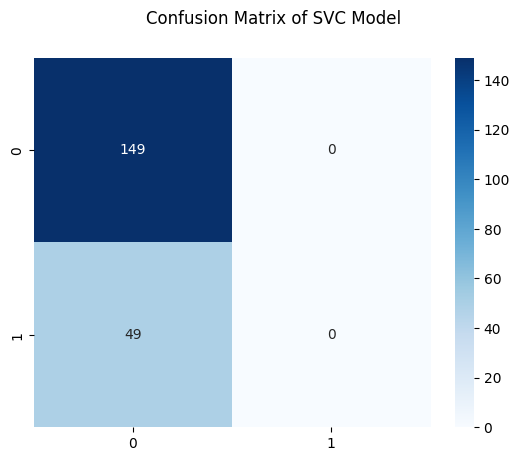

In [ ]:
cm = confusion_matrix(y_test, train_svc)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.suptitle("Confusion Matrix of SVC Model")
plt.show()

In [ ]:
# Calculate ROC AUC
probabilities = svm_pipeline.predict(X_test)
roc_auc_svc = roc_auc_score(y_test, probabilities)

tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print("ROC AUC Score:", roc_auc_svc)
print('Specificity:', specificity)
print('Sensitivity:', sensitivity)

ROC AUC Score: 0.5
Specificity: 1.0
Sensitivity: 0.0


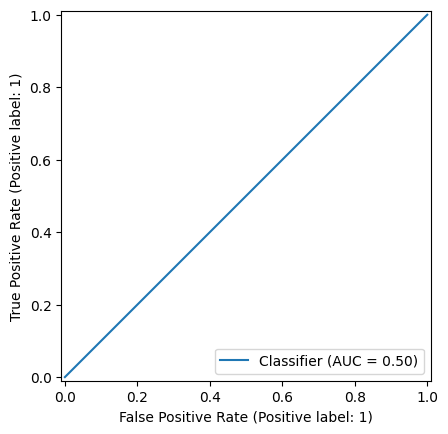

In [ ]:
RocCurveDisplay.from_predictions(y_test, probabilities, pos_label=1)
plt.show()

In [ ]:
model_svm = SVC(C=0.1,
                class_weight='balanced',
                degree=2,
                gamma=1,
                kernel='rbf',
                max_iter=500)

In [ ]:
svm_pipelines = ImbPipeline([('preprocessing', preprocessing),
                            ('oversampling', SMOTE(random_state=1)),
                            ('model', model_svm)])

roc_auc = []
specificity = []
sensitivity = []

for i in range(5):
    svm_pipelines.fit(X_train, y_train)

    train_svm = svm_pipelines.predict(X_test)

    # Calculate ROC AUC
    probabilities = svm_pipelines.predict(X_test)
    roc_auc_svm = roc_auc_score(y_test, probabilities)

    cm = confusion_matrix(y_test, train_svm)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)

    print(f"iteration{i+1}")
    print(f"ROC_AUC = {roc_auc_svm}")
    print(f"Specificity = {specificity}")
    print(f"Sensitivity = {sensitivity}")
    print(" ")

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


iteration1
ROC_AUC = 0.5
Specificity = 1.0
Sensitivity = 0.0
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


iteration2
ROC_AUC = 0.5
Specificity = 1.0
Sensitivity = 0.0
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


iteration3
ROC_AUC = 0.5
Specificity = 1.0
Sensitivity = 0.0
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


iteration4
ROC_AUC = 0.5
Specificity = 1.0
Sensitivity = 0.0
 


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


iteration5
ROC_AUC = 0.5
Specificity = 1.0
Sensitivity = 0.0
 


XGBoost

In [ ]:
#Fit the XGBoost Pipeline
xgbpipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessing),
    ('smote', SMOTE(random_state=42)),  # Menangani data imbalance
    ('classifier', XGBClassifier())
])

In [ ]:
# Define the parameter grid for the XGBoost model
xgb_param_grid = {
    'classifier__n_estimators': [100, 200, 300],  # Number of boosting rounds
    'classifier__learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used in update to prevents overfitting
    'classifier__max_depth': [3, 5, 7],  # Maximum depth of a tree
    'classifier__subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training instance
    'classifier__colsample_bytree': [0.8, 0.9, 1.0]  # Subsample ratio of columns when constructing each tree
}

# Create GridSearchCV object
xgb_grid_search = GridSearchCV(
    xgbpipeline,  # Your XGBoost pipeline
    param_grid=xgb_param_grid,  # Now param_grid is defined
    cv=10,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

In [ ]:
#SD
std_dev_accuracy = np.std(xgb_y_pred)
print(f"Standar Deviasi Akurasi: {std_dev_accuracy:.4f}")

Standar Deviasi Akurasi: 0.4052


Interpretasi Model XGBoost

BATAS SUCII!!!

In [ ]:
param_xgb_main = {'max_depth': np.arange(5, 10),
                  'eta': [0.01, 0.05, 0.1, 0.15, 0.2],
                  'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
                  'n_estimators': [100, 200, 300, 400, 500],
                  'lambda': np.arange(0, 10),
                  'gamma': np.arange(0, 10),
                  'colsample_bytree':np.arange(0.5, 1),
                  'min_child_weight':np.arange(4, 10)}

In [ ]:
param_xgb = {'max_depth': np.arange(5, 10),
             'eta': [0.01, 0.05, 0.10, 0.15, 0.20],
             'gamma': np.arange(0, 10),
             'lambda': np.arange(0, 10)}

xgb_grid = GridSearchCV(XGBClassifier(n_estimators=250,
                                      subsample=0.8,
                                      objective='binary:logistic',
                                      eval_metric='logloss'),
                        param_grid=param_xgb, cv=5, scoring ='roc_auc', n_jobs=-1)

xgb_pipeline = ImbPipeline([('preprocessing', preprocessing),
                            ('oversampling', SMOTE(random_state=1)),
                            ('grid_search', xgb_grid)])

xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical',
                                                  Pipeline(steps=[('Scaler',
                                                                   MinMaxScaler())]),
                                                  ['months_as_customer', 'age',
                                                   'policy_deductable',
                                                   'policy_annual_premium',
                                                   'umbrella_limit',
                                                   'capital-gains',
                                                   'capital-loss',
                                                   'incident_hour_of_the_day',
                                                   'number_of_vehicles_involved',
                                                   'bodily_injuries',
                                                   'witnesse...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=250,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...),
                              n_jobs=-1,
                              param_grid={'eta': [0.01, 0.05, 0.1, 0.15, 0.2],
                                          'gamma': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                          'lambda': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                          'max_depth': array([5, 6, 7, 8, 9])},
                              scoring='roc_auc'))])

In [ ]:
# Mengakses hyperparameter terbaik dari GridSearchCV
best_params = xgb_pipeline.named_steps['grid_search'].best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'eta': 0.05, 'gamma': 0, 'lambda': 9, 'max_depth': 9}


In [ ]:
train_xgb = xgb_pipeline.predict(X_test)
print(classification_report(y_test, train_xgb))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       149
           1       0.53      0.57      0.55        49

    accuracy                           0.77       198
   macro avg       0.69      0.70      0.70       198
weighted avg       0.77      0.77      0.77       198



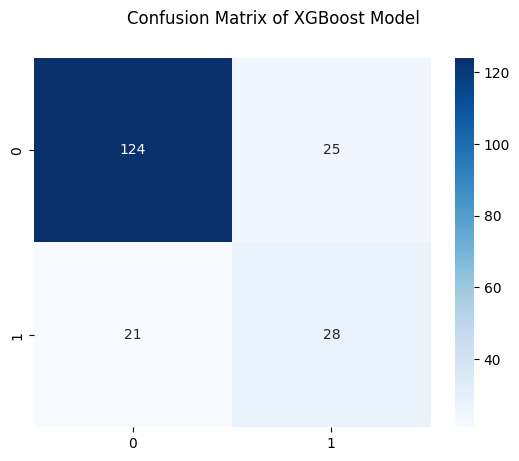

In [ ]:
XGBcm = confusion_matrix(y_test, train_xgb)
sns.heatmap(XGBcm, annot=True, fmt="d", cmap="Blues")
plt.suptitle("Confusion Matrix of XGBoost Model")
plt.show()

In [ ]:
# Calculate ROC AUC
probabilities = xgb_pipeline.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, probabilities)

tn, fp, fn, tp = XGBcm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print("ROC AUC Score:", roc_auc)
print('Specificity:', specificity)
print('Sensitivity:', sensitivity)

ROC AUC Score: 0.7898917956444322
Specificity: 0.8322147651006712
Sensitivity: 0.5714285714285714


In [ ]:
model_xgb = XGBClassifier(n_estimators=250,
                          subsample=0.8,
                          objective='binary:logistic',
                          eval_metric='logloss',
                          eta=0.05, gamma=0, reg_lambda=9, max_depth=9)

In [ ]:
xgb_pipelines = ImbPipeline([('preprocessing', preprocessing),
                            ('oversampling', SMOTE(random_state=1)),
                            ('model', model_xgb)])

roc_auc = []
specificity = []
sensitivity = []

for i in range(5):
    xgb_pipelines.fit(X_train, y_train)

    train_xgb = xgb_pipelines.predict(X_test)

    # Calculate ROC AUC
    probabilities = xgb_pipelines.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, probabilities)

    cm = confusion_matrix(y_test, train_xgb)
    tn, fp, fn, tp = XGBcm.ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)

    print(f"iteration{i+1}")
    print(f"ROC_AUC = {roc_auc}")
    print(f"Specificity = {specificity}")
    print(f"Sensitivity = {sensitivity}")
    print(" ")

    # Summary of results
print("Average ROC AUC:", np.mean(roc_auc))
print("Average Specificity:", np.mean(specificity))
print("Average Sensitivity:", np.mean(sensitivity))

iteration1
ROC_AUC = 0.7898917956444322
Specificity = 0.8322147651006712
Sensitivity = 0.5714285714285714
 
iteration2
ROC_AUC = 0.7898917956444322
Specificity = 0.8322147651006712
Sensitivity = 0.5714285714285714
 
iteration3
ROC_AUC = 0.7898917956444322
Specificity = 0.8322147651006712
Sensitivity = 0.5714285714285714
 
iteration4
ROC_AUC = 0.7898917956444322
Specificity = 0.8322147651006712
Sensitivity = 0.5714285714285714
 
iteration5
ROC_AUC = 0.7898917956444322
Specificity = 0.8322147651006712
Sensitivity = 0.5714285714285714
 
Average ROC AUC: 0.7898917956444322
Average Specificity: 0.8322147651006712
Average Sensitivity: 0.5714285714285714


Interpretasi Model

Text(0.5, 0, 'Decrease in Accuracy Score')

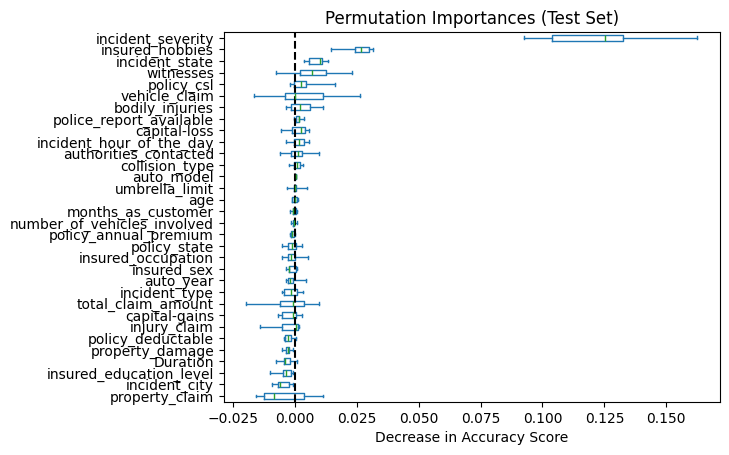

In [ ]:
#PERMUTATION IMPORTANCE Random Forest

feature_names = X.columns

result = permutation_importance(rf_pipeline, X_test, y_test, n_repeats=10, random_state=1)

sorted_importances_idx_rf = result.importances_mean.argsort()
importances = pd.DataFrame(result.importances[sorted_importances_idx_rf[0:33]].T,
                           columns=feature_names[sorted_importances_idx_rf[0:33]])

ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (Test Set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in Accuracy Score")

Text(0.5, 0, 'Decrease in Accuracy Score')

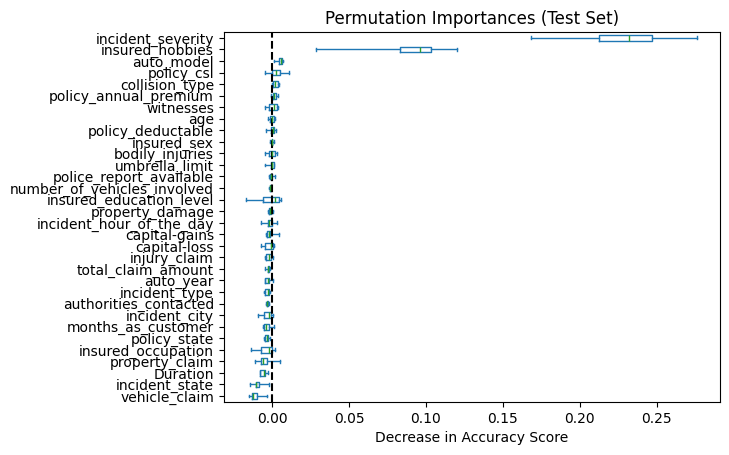

In [ ]:
#PERMUTATION IMPORTANCE XGBoost

feature_names = X.columns

result = permutation_importance(xgb_pipeline, X_test, y_test, n_repeats=10, random_state=1)

sorted_importances_idx_xgb = result.importances_mean.argsort()
importances = pd.DataFrame(result.importances[sorted_importances_idx_xgb[0:33]].T,
                           columns=feature_names[sorted_importances_idx_xgb[0:33]])

ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (Test Set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in Accuracy Score")

In [ ]:
numerical_columns_sorted_rf = [feature_names[i] for i in sorted_importances_idx_rf if feature_names[i] in numerical_columns]
numerical_columns_sorted_rf.reverse()

print(numerical_columns_sorted_rf)

['witnesses', 'vehicle_claim', 'bodily_injuries', 'capital-loss', 'incident_hour_of_the_day', 'umbrella_limit', 'age', 'months_as_customer', 'number_of_vehicles_involved', 'policy_annual_premium', 'auto_year', 'total_claim_amount', 'capital-gains', 'injury_claim', 'policy_deductable', 'Duration', 'property_claim']


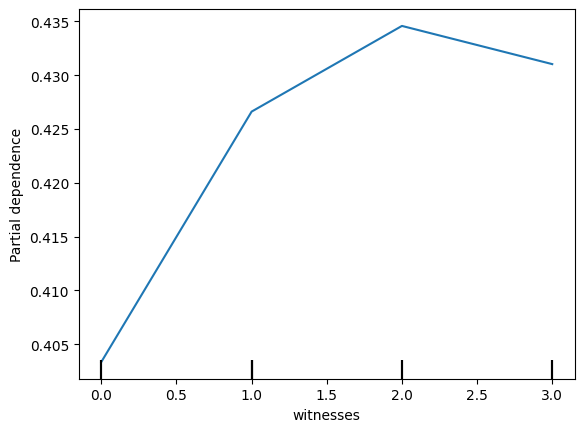

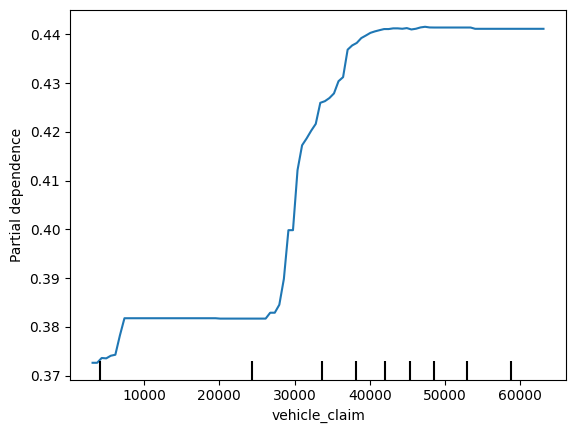

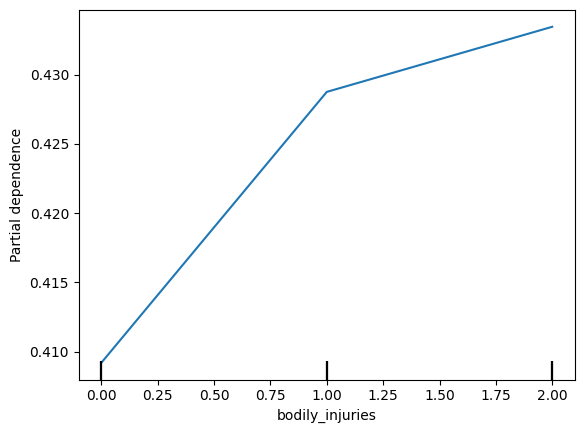

In [ ]:
#PDP random forest
from sklearn.inspection import PartialDependenceDisplay
data = X
PartialDependenceDisplay.from_estimator(rf_pipeline, data, [(numerical_columns_sorted_rf[0])], feature_names=feature_names)

PartialDependenceDisplay.from_estimator(rf_pipeline, data, [(numerical_columns_sorted_rf[1])], feature_names=feature_names)

PartialDependenceDisplay.from_estimator(rf_pipeline, data, [(numerical_columns_sorted_rf[2])], feature_names=feature_names)

In [ ]:
numerical_columns_sorted_xgb = [feature_names[i] for i in sorted_importances_idx_xgb if feature_names[i] in numerical_columns]
numerical_columns_sorted_xgb.reverse()

print(numerical_columns_sorted_xgb)

['policy_annual_premium', 'witnesses', 'age', 'policy_deductable', 'bodily_injuries', 'umbrella_limit', 'number_of_vehicles_involved', 'incident_hour_of_the_day', 'capital-gains', 'capital-loss', 'injury_claim', 'total_claim_amount', 'auto_year', 'months_as_customer', 'property_claim', 'Duration', 'vehicle_claim']


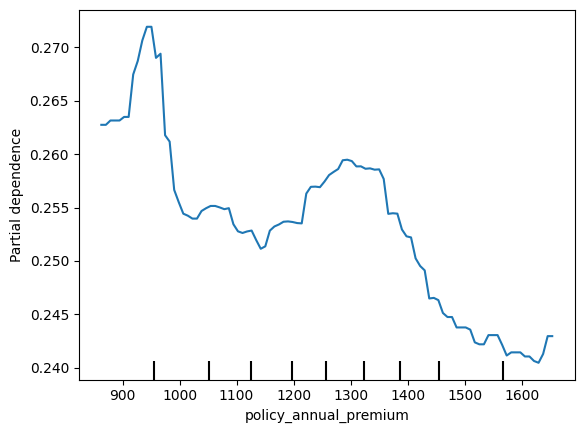

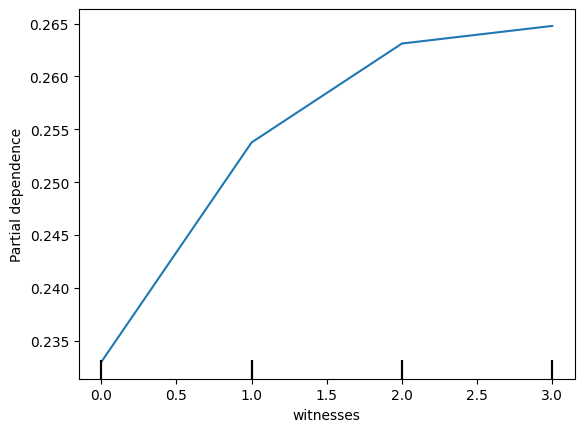

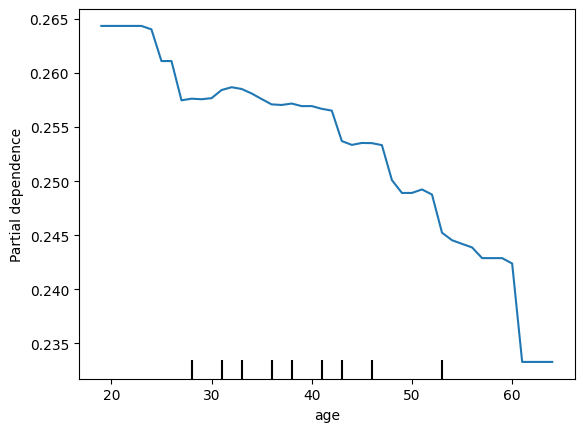

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
data = X
PartialDependenceDisplay.from_estimator(xgb_pipeline, data, [(numerical_columns_sorted_xgb[0])], feature_names=feature_names)

PartialDependenceDisplay.from_estimator(xgb_pipeline, data, [(numerical_columns_sorted_xgb[1])], feature_names=feature_names)

PartialDependenceDisplay.from_estimator(xgb_pipeline, data, [(numerical_columns_sorted_xgb[2])], feature_names=feature_names)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


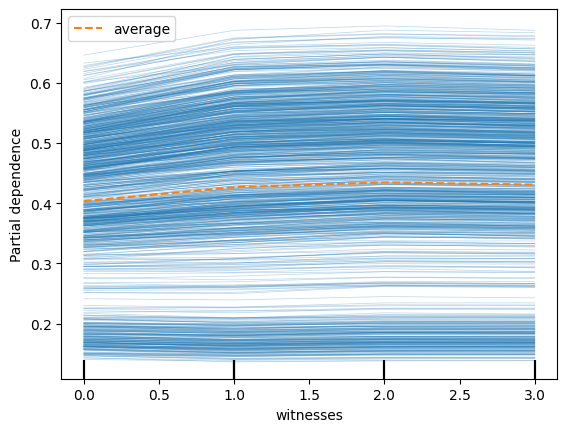

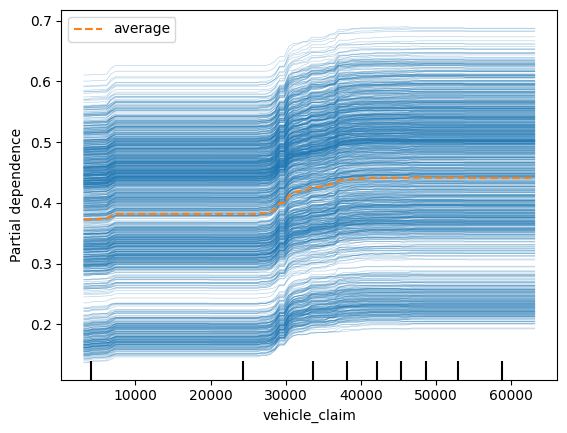

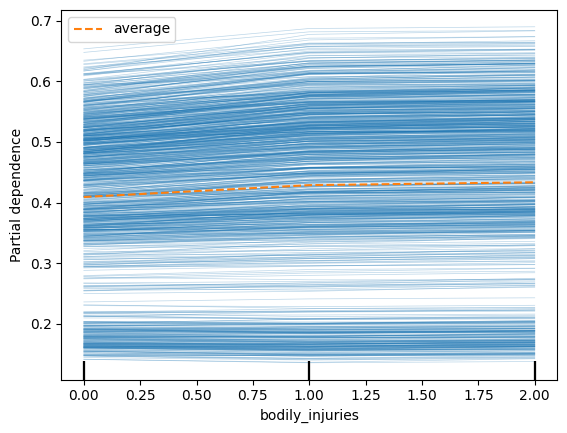

In [ ]:
#ICE Random Forest
from sklearn.inspection import PartialDependenceDisplay
data = X
PartialDependenceDisplay.from_estimator(rf_pipeline, data, [(numerical_columns_sorted_rf[0])], feature_names=feature_names, kind='both')

PartialDependenceDisplay.from_estimator(rf_pipeline, data, [(numerical_columns_sorted_rf[1])], feature_names=feature_names, kind='both')

PartialDependenceDisplay.from_estimator(rf_pipeline, data, [(numerical_columns_sorted_rf[2])], feature_names=feature_names, kind='both')

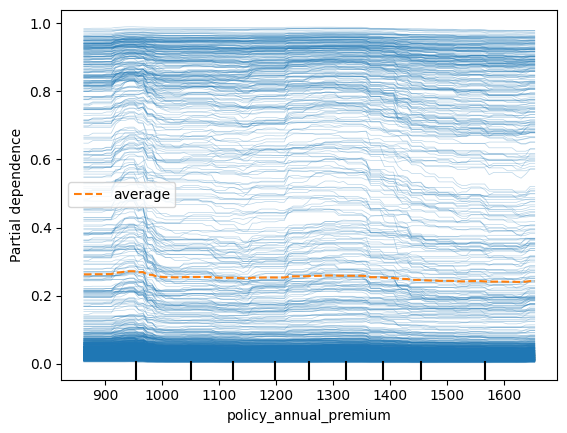

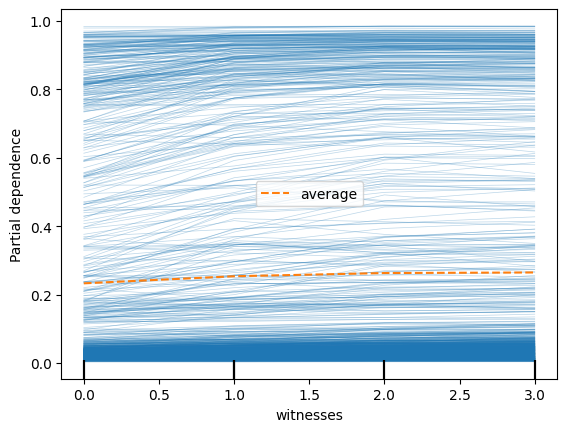

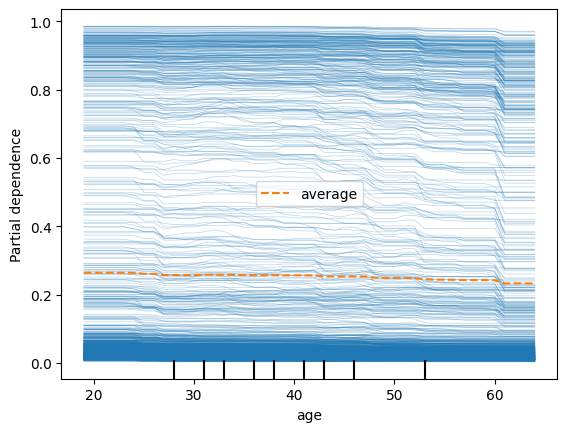

In [ ]:
#ICE xgboost
from sklearn.inspection import PartialDependenceDisplay
data = X
PartialDependenceDisplay.from_estimator(xgb_pipeline, data, [(numerical_columns_sorted_xgb[0])], feature_names=feature_names, kind='both')

PartialDependenceDisplay.from_estimator(xgb_pipeline, data, [(numerical_columns_sorted_xgb[1])], feature_names=feature_names, kind='both')

PartialDependenceDisplay.from_estimator(xgb_pipeline, data, [(numerical_columns_sorted_xgb[2])], feature_names=feature_names, kind='both')